# 3. 지역용도에 따라 열지수의 차이가 나타난다.
- made by EH,KHW

# 1. 데이터 전처리

### 1. 데이터 불러오기

* 로우 데이터를 통합해 저장한 후 대구 지역만 추출해 저장하는 코드

In [102]:
import pandas as pd
import glob
import openpyxl
%matplotlib inline
import matplotlib.pylab as plt
import random
import seaborn as sns
import matplotlib

In [103]:
# concat_list = []

# try:
#     path = './dataset/electrocity/'
#     files = glob.glob(path + "*.xlsx")

#     for file_name in files:
#         df = pd.read_excel(file_name)
#         df = pd.DataFrame(df)
#         concat_list.append(df)

# except Exception as ex:
#     print('error' + str(ex))


# df1 = pd.concat(concat_list)

# df1

# elect_daegu = df1[df1['시도'] == '대구광역시']

# elect_daegu.to_csv('./output/elec_daegu.csv')

* 대구 기상 데이터를 월별로 통합해 저장하는 코드

In [104]:
daegu_final = pd.read_csv('./output/daegu_final.csv')

daegu_final

,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,HI,DI
0,2010,6,1,0,2010-06-01 00:00:00,16.5,0.0,-1,53.0,NaN,NaN,1,동인동,15.589444,60.74355
1,2010,6,1,1,2010-06-01 01:00:00,18.1,0.0,-1,49.0,NaN,NaN,1,동인동,17.245000,62.73431
2,2010,6,1,2,2010-06-01 02:00:00,19.7,0.0,-1,46.0,NaN,NaN,1,동인동,18.926667,64.65038
3,2010,6,1,3,2010-06-01 03:00:00,20.8,0.0,-1,41.0,NaN,NaN,1,동인동,20.006111,65.72772
4,2010,6,1,4,2010-06-01 04:00:00,22.2,0.0,-1,36.0,NaN,NaN,2,동인동,21.415556,67.04608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,2022,4,30,19,2022-04-30 19:00:00,10.7,0.0,-1,71.0,2.1,335.0,-1,구지면,9.679444,52.33503
14831612,2022,4,30,20,2022-04-30 20:00:00,11.0,0.0,-1,65.0,2.2,339.0,-1,구지면,9.852778,52.99350
14831613,2022,4,30,21,2022-04-30 21:00:00,11.9,0.0,-1,61.0,2.2,338.0,-1,구지면,10.738333,54.40241
14831614,2022,4,30,22,2022-04-30 22:00:00,13.4,0.0,-1,53.0,2.0,351.0,-1,구지면,12.179444,56.60598


In [105]:
# 상관관계 분석에 필요한 column들만 추출
daegu_final = daegu_final[['year','month','region','HI']]

# 일별로 나누어진 데이터를 월별 평균값으로 groupby
daegu_final_month = daegu_final.groupby(['year','month', 'region']).mean().reset_index()

In [106]:
# 데이터 저장
daegu_final_month.to_csv('./output/daegu_final_month.csv', index=False)

* 저장한 데이터 불러오기

In [107]:
elec_daegu = pd.read_csv('./output/elec_daegu.csv', index_col=0)

elec_daegu

C:\Users\trap1\AppData\Local\Temp\ipykernel_6872\1620910297.py:1: DtypeWarning: Columns (5,7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  elec_daegu = pd.read_csv('./output/elec_daegu.csv', index_col=0)


,년도,월,시도,시군구,읍면동(행정동),계약종별,고객호수,판매량,판매요금,행정동,사용량,전기요금,행정동코드,호수,전력사용량
5309,2022,1,대구광역시,남구,송현2동,가로등,62447,5486690.0,3.219613e+08,NaN,NaN,NaN,NaN,NaN,NaN
5310,2022,1,대구광역시,남구,송현2동,교육용,632214,166331209.0,2.015713e+10,NaN,NaN,NaN,NaN,NaN,NaN
5311,2022,1,대구광역시,남구,송현2동,농사용,176,231066.0,9.040889e+06,NaN,NaN,NaN,NaN,NaN,NaN
5312,2022,1,대구광역시,남구,송현2동,산업용,2662,7105615.0,8.271090e+08,NaN,NaN,NaN,NaN,NaN,NaN
5313,2022,1,대구광역시,남구,송현2동,심야,21571,26705734.0,1.933639e+09,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20421,2022,2,대구광역시,중구,NaN,일반용,5473,NaN,NaN,성내3동,16725392.0,2.214401e+09,NaN,NaN,NaN
20422,2022,2,대구광역시,중구,NaN,주택용,7905,NaN,NaN,대봉2동,4518507.0,5.833351e+08,NaN,NaN,NaN
20423,2022,2,대구광역시,중구,NaN,일반용,9136,NaN,NaN,남산4동,21528292.0,2.816247e+09,NaN,NaN,NaN
20424,2022,2,대구광역시,중구,NaN,주택용,9824,NaN,NaN,성내3동,5313300.0,6.625160e+08,NaN,NaN,NaN


### 2. 데이터 전처리

column명이 분리되어 있다

판매량 = 사용량 = 전력사용량  
판매요금 = 전기요금  
읍면동(행정동) = 행정동  
고객호수 = 호수

In [108]:
print('판매량 not null 값 수 :', elec_daegu['판매량'].notnull().sum())
print('사용량 not null 값 수 :', elec_daegu['사용량'].notnull().sum())
print('전력사용량 not null 값 수 :', elec_daegu['전력사용량'].notnull().sum())

판매량 not null 값 수 : 15913
사용량 not null 값 수 : 11087
전력사용량 not null 값 수 : 129481


판매량, 사용량, 전력사용량

* 겹치는 경우가 있는지 확인 => 겹친다면 완전히 분리된 column이 아니기 때문에 합칠 수 없다

In [109]:
elec_daegu[elec_daegu['판매량'].notnull() & elec_daegu['전력사용량'].notnull()]

,년도,월,시도,시군구,읍면동(행정동),계약종별,고객호수,판매량,판매요금,행정동,사용량,전기요금,행정동코드,호수,전력사용량


In [110]:
elec_daegu[elec_daegu['판매량'].notnull() & elec_daegu['사용량'].notnull()]

,년도,월,시도,시군구,읍면동(행정동),계약종별,고객호수,판매량,판매요금,행정동,사용량,전기요금,행정동코드,호수,전력사용량


In [111]:
elec_daegu[elec_daegu['사용량'].notnull() & elec_daegu['전력사용량'].notnull()]

,년도,월,시도,시군구,읍면동(행정동),계약종별,고객호수,판매량,판매요금,행정동,사용량,전기요금,행정동코드,호수,전력사용량


In [112]:
elec_daegu[elec_daegu['판매량'].notnull() & elec_daegu['사용량'].notnull() & elec_daegu['전력사용량'].notnull()]

,년도,월,시도,시군구,읍면동(행정동),계약종별,고객호수,판매량,판매요금,행정동,사용량,전기요금,행정동코드,호수,전력사용량


* 전력사용량 column에 다른 column의 값을 채워준다

In [113]:
# 전력사용량 값이 없는 row에 사용량 값을 채워줌 
elec_daegu.loc[elec_daegu['전력사용량'].isnull() & elec_daegu['사용량'].notnull(), '전력사용량'] = elec_daegu.loc[elec_daegu['사용량'].notnull(), '사용량']

In [114]:
# 전력사용량 값이 없는 row에 판매량 값을 채워줌
elec_daegu.loc[elec_daegu['전력사용량'].isnull() & elec_daegu['판매량'].notnull(), '전력사용량'] = elec_daegu.loc[elec_daegu['판매량'].notnull(), '판매량']

In [115]:
print('판매량 not null 값 수 :', elec_daegu['판매량'].notnull().sum())
print('사용량 not null 값 수 :', elec_daegu['사용량'].notnull().sum())
print('전력사용량 not null 값 수 :', elec_daegu['전력사용량'].notnull().sum())

판매량 not null 값 수 : 15913
사용량 not null 값 수 : 11087
전력사용량 not null 값 수 : 156481


* 전력사용량 외 다른 column 제거 (이미 값을 채워줬기 때문에)

In [116]:
elec_daegu.drop(columns= ['판매량','사용량'], inplace=True)

판매요금, 전기요금

* 더 직관적인 전력사용량 column이 있기때문에 제거

In [117]:
elec_daegu.drop(columns=['판매요금','전기요금'], inplace=True)

읍면동(행정동), 행정동, 행정동코드

In [118]:
print('읍면동(행정동) not null 값 수 :', elec_daegu['읍면동(행정동)'].notnull().sum())
print('행정동 not null 값 수 :', elec_daegu['행정동'].notnull().sum())
print('행정동코드 not null 값 수 :', elec_daegu['행정동코드'].notnull().sum())

읍면동(행정동) not null 값 수 : 18721
행정동 not null 값 수 : 2765
행정동코드 not null 값 수 : 166835


* 겹치는 경우가 있는지 확인

In [119]:
elec_daegu[elec_daegu['읍면동(행정동)'].notnull() & elec_daegu['행정동'].notnull()]

,년도,월,시도,시군구,읍면동(행정동),계약종별,고객호수,행정동,행정동코드,호수,전력사용량


* 행정동 column에 다른 column의 값을 채워준다

In [120]:
elec_daegu.loc[elec_daegu['행정동'].isnull() & elec_daegu['읍면동(행정동)'].notnull(), '행정동'] = elec_daegu.loc[elec_daegu['읍면동(행정동)'].notnull(), '읍면동(행정동)']

In [121]:
elec_daegu.loc[elec_daegu['행정동'].isnull() & elec_daegu['행정동코드'].notnull(), '행정동'] = elec_daegu.loc[elec_daegu['행정동코드'].notnull(), '행정동코드']

In [122]:
print('행정동 not null 값 수 :', elec_daegu['행정동'].notnull().sum())

행정동 not null 값 수 : 188321


* 행정동 외 다른 column 제거

In [123]:
elec_daegu.drop(columns= ['읍면동(행정동)','행정동코드'], inplace=True)

고객호수, 호수

In [124]:
print('고객호수 not null 값 수 :', elec_daegu['고객호수'].notnull().sum())
print('호수 not null 값 수 :', elec_daegu['호수'].notnull().sum())

고객호수 not null 값 수 : 31868
호수 not null 값 수 : 156453


* 겹치는 경우가 있는지 확인

In [125]:
elec_daegu[elec_daegu['고객호수'].notnull() & elec_daegu['호수'].notnull()]

,년도,월,시도,시군구,계약종별,고객호수,행정동,호수,전력사용량


* 호수 column에 다른 column의 값을 채워준다

In [126]:
elec_daegu.loc[elec_daegu['호수'].isnull() & elec_daegu['고객호수'].notnull(), '호수'] = elec_daegu.loc[elec_daegu['고객호수'].notnull(), '고객호수']

In [127]:
print('호수 not null 값 수 :', elec_daegu['호수'].notnull().sum())

호수 not null 값 수 : 188321


* 호수 외 다른 column 제거

In [128]:
elec_daegu.drop(columns= ['고객호수', '시도'], inplace=True)

In [129]:
# 확인
elec_daegu

,년도,월,시군구,계약종별,행정동,호수,전력사용량
5309,2022,1,남구,가로등,송현2동,62447,5486690.0
5310,2022,1,남구,교육용,송현2동,632214,166331209.0
5311,2022,1,남구,농사용,송현2동,176,231066.0
5312,2022,1,남구,산업용,송현2동,2662,7105615.0
5313,2022,1,남구,심야,송현2동,21571,26705734.0
...,...,...,...,...,...,...,...
20421,2022,2,중구,일반용,성내3동,5473,16725392.0
20422,2022,2,중구,주택용,대봉2동,7905,4518507.0
20423,2022,2,중구,일반용,남산4동,9136,21528292.0
20424,2022,2,중구,주택용,성내3동,9824,5313300.0


In [130]:
elec_daegu.rename(columns= {'년도':'year','월':'month', '시군구':'city', '행정동':'region', '계약종별':'type', '호수':'unitcount', '전력사용량':'elecusage'}, inplace=True)

elec_daegu

,year,month,city,type,region,unitcount,elecusage
5309,2022,1,남구,가로등,송현2동,62447,5486690.0
5310,2022,1,남구,교육용,송현2동,632214,166331209.0
5311,2022,1,남구,농사용,송현2동,176,231066.0
5312,2022,1,남구,산업용,송현2동,2662,7105615.0
5313,2022,1,남구,심야,송현2동,21571,26705734.0
...,...,...,...,...,...,...,...
20421,2022,2,중구,일반용,성내3동,5473,16725392.0
20422,2022,2,중구,주택용,대봉2동,7905,4518507.0
20423,2022,2,중구,일반용,남산4동,9136,21528292.0
20424,2022,2,중구,주택용,성내3동,9824,5313300.0


### 3. 열지수 데이터와 join

열지수 데이터 불러오기

In [131]:
df_month_HI = pd.read_csv('output/daegu_final_month.csv', index_col=0)

df_month_HI

,month,region,HI
year,,,
2010,6,가창면,23.305656
2010,6,감삼동,25.102999
2010,6,검단동,24.829993
2010,6,고산1동,24.365673
2010,6,고산2동,24.365673
...,...,...,...
2022,4,화원읍,14.314315
2022,4,황금1동,15.073297
2022,4,황금2동,15.306008


In [132]:
# 월별로 잘 합쳐졌는지 확인
df_month_HI[df_month_HI['region']=='감삼동']

,month,region,HI
year,,,
2010,6,감삼동,25.102999
2010,7,감삼동,29.032874
2010,8,감삼동,32.861411
2010,9,감삼동,24.275275
2010,10,감삼동,15.627973
...,...,...,...
2021,12,감삼동,2.280273
2022,1,감삼동,0.474498
2022,2,감삼동,0.969430


join하기

In [133]:
df_join = pd.merge(df_month_HI, elec_daegu, left_on=['region','year','month'], right_on = ['region','year','month'], how='outer')

df_join

,month,year,region,HI,city,type,unitcount,elecusage
0,6,2010,가창면,23.305656,NaN,NaN,NaN,NaN
1,6,2010,감삼동,25.102999,NaN,NaN,NaN,NaN
2,6,2010,검단동,24.829993,NaN,NaN,NaN,NaN
3,6,2010,고산1동,24.365673,NaN,NaN,NaN,NaN
4,6,2010,고산2동,24.365673,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
197311,2,2022,다사읍서재출장소,NaN,달성군,농사용,122,62876.0
197312,2,2022,다사읍서재출장소,NaN,달성군,가로등,842,426872.0
197313,2,2022,다사읍서재출장소,NaN,달성군,산업용,1134,35268918.0
197314,2,2022,다사읍서재출장소,NaN,달성군,일반용,3614,7394266.0


null 값 확인

In [134]:
# join한 데이터의 열지수 null 값 확인
df_join.loc[df_join['HI'].isnull(), 'region'].unique()

array(['유천동', '논공읍공단출장소', '다사읍서재출장소', '옥포면', '유가면', '현풍면', '대명7동', '대명8동',
       '이천2동', '대명2,8동', '대명3,7동', '대곡동', '이곡동', '두류1동', '두류2동', '성당1동',
       '성당2동', '성서1동', '성서3동', '구지면 내리', '구지면 징리', '구지면 창리', '논공읍 남리',
       '논공읍 북리', '논공읍 상리', '논공읍 하리', '유가읍 금리', '유가읍 봉리', '유가읍 상리',
       '유가읍 양리', '유가읍 용리', '유가읍 음리', '하빈면 묘리', '현풍읍 대리', '현풍읍 부리',
       '현풍읍 상리', '현풍읍 중리', '현풍읍 지리', '현풍읍 하리', '가창면 냉천리', '가창면 단산리',
       '가창면 대일리', '가창면 삼산리', '가창면 상원리', '가창면 오동리', '가창면 옥분리', '가창면 용계리',
       '가창면 우록리', '가창면 정대리', '가창면 주동리', '가창면 행정리', '구지면 가천리', '구지면 고봉리',
       '구지면 대암리', '구지면 도동리', '구지면 목단리', '구지면 수리리', '구지면 예현리', '구지면 오설리',
       '구지면 유산리', '구지면 응암리', '구지면 평촌리', '구지면 화산리', '논공읍 금포리', '논공읍 노이리',
       '논공읍 본리리', '논공읍 삼리리', '논공읍 위천리', '다사읍 달천리', '다사읍 매곡리', '다사읍 문산리',
       '다사읍 문양리', '다사읍 박곡리', '다사읍 방천리', '다사읍 부곡리', '다사읍 서재리', '다사읍 세천리',
       '다사읍 이천리', '다사읍 죽곡리', '옥포읍 간경리', '옥포읍 강림리', '옥포읍 교항리', '옥포읍 기세리',
       '옥포읍 김흥리', '옥포읍 반송리', '옥포읍 본리리', '옥포읍 송촌리', '옥포읍 신당리', '유가읍 

두 테이블 사이에 안 겹치는 region 확인

In [135]:
# 열지수 데이터에는 있지만 전력사용량 데이터에는 없는 지역들
set(df_month_HI['region'].unique()) - set(elec_daegu['region'].unique())

{'구암동',
 '내당2.3동',
 '대명2동',
 '대명3동',
 '대신동',
 '동촌동',
 '비산2.3동',
 '수성1가동',
 '신천1.2동',
 '안심3.4동',
 '용산1동',
 '이곡1동',
 '태전1동'}

In [136]:
# 전력사용량 데이터에는 있지만 열지수 데이터에는 없는 지역들
set(elec_daegu['region'].unique()) - set(df_month_HI['region'].unique())

{'가창면 냉천리',
 '가창면 단산리',
 '가창면 대일리',
 '가창면 삼산리',
 '가창면 상원리',
 '가창면 오동리',
 '가창면 옥분리',
 '가창면 용계리',
 '가창면 우록리',
 '가창면 정대리',
 '가창면 주동리',
 '가창면 행정리',
 '검사1동',
 '검사동',
 '공산1동',
 '공산2동',
 '구지면 가천리',
 '구지면 고봉리',
 '구지면 내리',
 '구지면 대암리',
 '구지면 도동리',
 '구지면 목단리',
 '구지면 수리리',
 '구지면 예현리',
 '구지면 오설리',
 '구지면 유산리',
 '구지면 응암리',
 '구지면 징리',
 '구지면 창리',
 '구지면 평촌리',
 '구지면 화산리',
 '내당2,3동',
 '노곡동',
 '노원1,2동',
 '노원3동',
 '논공읍 금포리',
 '논공읍 남리',
 '논공읍 노이리',
 '논공읍 본리리',
 '논공읍 북리',
 '논공읍 삼리리',
 '논공읍 상리',
 '논공읍 위천리',
 '논공읍 하리',
 '논공읍공단출장소',
 '다사읍 달천리',
 '다사읍 매곡리',
 '다사읍 문산리',
 '다사읍 문양리',
 '다사읍 박곡리',
 '다사읍 방천리',
 '다사읍 부곡리',
 '다사읍 서재리',
 '다사읍 세천리',
 '다사읍 이천리',
 '다사읍 죽곡리',
 '다사읍서재출장소',
 '달성군',
 '대곡동',
 '대명2,8동',
 '대명3,7동',
 '대명7동',
 '대명8동',
 '대신1동',
 '대신2동',
 '도동',
 '동인1,2,4가동',
 '두류1동',
 '두류2동',
 '둔산동',
 '둔산부동',
 '매호동',
 '봉무동',
 '불로동',
 '비산2,3동',
 '비산3동',
 '성당1동',
 '성당2동',
 '성서1동',
 '성서3동',
 '송정동',
 '수성동1가',
 '수성동2가',
 '수성동3가',
 '수성동4가',
 '신천1동',
 '신천2동',
 '신평동',
 '옥포면',
 '옥포읍 간경리',
 '옥포읍 강림리',
 '옥포읍 교항리',
 '옥포읍 기세리',
 '옥

* 테이블별로 전체 region 확인

In [137]:
# 전력사용량 테이블 region
elec_daegu['region'].unique()

array(['송현2동', '이천동', '도원동', '본리동', '성당동', '신당동', '용산2동', '유천동', '이곡2동',
       '장기동', '죽전동', '진천동', '가창면', '구지면', '논공읍', '논공읍공단출장소', '다사읍',
       '다사읍서재출장소', '옥포면', '옥포읍', '유가면', '유가읍', '하빈면', '현풍면', '현풍읍', '화원읍',
       '공산동', '도평동', '불로.봉무동', '신암5동', '신천4동', '안심2동', '안심3동', '안심4동',
       '지저동', '해안동', '혁신동', '효목2동', '고성동', '관문동', '관음동', '국우동', '노원동',
       '동천동', '무태조야동', '산격2동', '산격3동', '산격4동', '읍내동', '칠성동', '침산1동',
       '침산3동', '태전2동', '두류1.2동', '상중이동', '원대동', '평리6동', '고산1동', '고산2동',
       '고산3동', '만촌3동', '범물2동', '상동', '수성2.3가동', '수성4가동', '중동', '지산2동',
       '파동', '황금1동', '황금2동', '남산4동', '대봉2동', '동인동', '삼덕동', '성내1동', '성내2동',
       '성내3동', '대명1동', '대명4동', '대명5동', '대명6동', '대명7동', '대명8동', '대명9동',
       '봉덕1동', '봉덕2동', '봉덕3동', '이천2동', '대명10동', '대명11동', '대명2,8동',
       '대명3,7동', '본동', '감삼동', '대곡동', '이곡동', '두류1동', '두류2동', '두류3동',
       '상인1동', '상인2동', '상인3동', '성당1동', '성당2동', '성서1동', '성서3동', '송현1동',
       '월성1동', '월성2동', '구지면 내리', '구지면 징리', '구지면 창리', '논공읍 남리', '논공읍 북리',
     

In [138]:
# 열지수 테이블 region
df_month_HI['region'].unique()

array(['가창면', '감삼동', '검단동', '고산1동', '고산2동', '고산3동', '고성동', '공산동', '관문동',
       '관음동', '구암동', '구지면', '국우동', '남산1동', '남산2동', '남산3동', '남산4동', '내당1동',
       '내당2.3동', '내당4동', '노원동', '논공읍', '다사읍', '대명10동', '대명11동', '대명1동',
       '대명2동', '대명3동', '대명4동', '대명5동', '대명6동', '대명9동', '대봉1동', '대봉2동',
       '대신동', '대현동', '도원동', '도평동', '동인동', '동천동', '동촌동', '두류1.2동', '두류3동',
       '두산동', '만촌1동', '만촌2동', '만촌3동', '무태조야동', '방촌동', '범물1동', '범물2동',
       '범어1동', '범어2동', '범어3동', '범어4동', '복현1동', '복현2동', '본동', '본리동',
       '봉덕1동', '봉덕2동', '봉덕3동', '불로.봉무동', '비산1동', '비산2.3동', '비산4동', '비산5동',
       '비산6동', '비산7동', '산격1동', '산격2동', '산격3동', '산격4동', '삼덕동', '상동',
       '상인1동', '상인2동', '상인3동', '상중이동', '성내1동', '성내2동', '성내3동', '성당동',
       '송현1동', '송현2동', '수성1가동', '수성2.3가동', '수성4가동', '신당동', '신암1동', '신암2동',
       '신암3동', '신암4동', '신암5동', '신천1.2동', '신천3동', '신천4동', '안심1동', '안심2동',
       '안심3.4동', '안심3동', '안심4동', '옥포읍', '용산1동', '용산2동', '원대동', '월성1동',
       '월성2동', '유가읍', '읍내동', '이곡1동', '이곡2동', '이천동', '장기동', '죽전동',

* 리로 세분화되어 있는 region은 읍면으로 통일

In [139]:
ri_list = ['구지면 내리', '구지면 징리', '구지면 창리', '논공읍 남리',
       '논공읍 북리', '논공읍 상리', '논공읍 하리', '유가읍 금리', '유가읍 봉리', '유가읍 상리',
       '유가읍 양리', '유가읍 용리', '유가읍 음리', '하빈면 묘리', '현풍읍 대리', '현풍읍 부리',
       '현풍읍 상리', '현풍읍 중리', '현풍읍 지리', '현풍읍 하리', '가창면 냉천리', '가창면 단산리',
       '가창면 대일리', '가창면 삼산리', '가창면 상원리', '가창면 오동리', '가창면 옥분리', '가창면 용계리',
       '가창면 우록리', '가창면 정대리', '가창면 주동리', '가창면 행정리', '구지면 가천리', '구지면 고봉리',
       '구지면 대암리', '구지면 도동리', '구지면 목단리', '구지면 수리리', '구지면 예현리', '구지면 오설리',
       '구지면 유산리', '구지면 응암리', '구지면 평촌리', '구지면 화산리', '논공읍 금포리', '논공읍 노이리',
       '논공읍 본리리', '논공읍 삼리리', '논공읍 위천리', '다사읍 달천리', '다사읍 매곡리', '다사읍 문산리',
       '다사읍 문양리', '다사읍 박곡리', '다사읍 방천리', '다사읍 부곡리', '다사읍 서재리', '다사읍 세천리',
       '다사읍 이천리', '다사읍 죽곡리', '옥포읍 간경리', '옥포읍 강림리', '옥포읍 교항리', '옥포읍 기세리',
       '옥포읍 김흥리', '옥포읍 반송리', '옥포읍 본리리', '옥포읍 송촌리', '옥포읍 신당리', '유가읍 가태리',
       '유가읍 도의리', '유가읍 본말리', '유가읍 쌍계리', '유가읍 유곡리', '유가읍 초곡리', '유가읍 한정리',
       '하빈면 감문리', '하빈면 기곡리', '하빈면 대평리', '하빈면 동곡리', '하빈면 무등리', '하빈면 봉촌리',
       '하빈면 하산리', '하빈면 현내리', '현풍읍 성하리', '현풍읍 신기리', '현풍읍 오산리', '현풍읍 원교리',
       '현풍읍 자모리', '화원읍 구라리', '화원읍 명곡리', '화원읍 본리리', '화원읍 설화리', '화원읍 성산리',
       '화원읍 천내리']

for i in range(len(ri_list)):
    elec_daegu.loc[(elec_daegu['region'] == ri_list[i]), 'region'] = ri_list[i][:3]

전처리 해야할 것  


1. 내당2,3동을 '내당2.3동'으로 변경  
1. 신천1동과 2동을 '신천1.2동'으로 통합  
1. 안심3동과 4동을 2020년 7월 이전까지 '안심3.4동'으로 통합  
1. 대명2,8동을 '대명2동'으로 변경  
1. 대명3,7동을 '대명3동'으로 변경  
1. 대신1동과 2동을 '대신동'으로 통합  
1. 비산2,3동을 '비산2.3동'으로 변경  
1. 수성동1가를 '수성1가동'으로 변경  
1. 수성동2가와 수성동3가를 '수성2.3가동'으로 통합  
1. 수성동4가를 '수성4가동'로 변경  
1. 이곡2동을 '이곡동'으로 변경  
1. 태전동을 '태전1동'으로 변경  
1. 검사동,검사1동,입석동을 '동촌동'으로 통합  
1. 칠곡1동을 '구암동'으로 변경  
1. 칠곡2동을 '관문동'으로 변경
1. 칠곡3동을 '국우동'으로 변경
1. 불로동과 봉무동을 '불로.봉무동'으로 통합
1. 논공읍공단출장소를 '논공읍'으로 변경
1. 다사읍서재출장소를 '다사읍'으로 변경
1. 공산1동과 공산2동을 '공산동'으로 통합
1. 현풍면을 '현풍읍'으로 변경
1. 옥포면을 '옥포읍'으로 변경
1. 노원1,2동과 노원3동을 '노원동'으로 통합
1. 동인1,2,4가동을 '동인동'으로 변경
1. 두류1동과 두류2동을 '두류1.2동'으로 통합
1. 성당1동과 성당2동을 '성당동'으로 통합  
1. 노곡동을 '관문동'으로 변경  
1. 대곡동을 '성내동'으로 변경  
1. 도동을 '도평동'으로 변경  
1. 매호동을 '고산3동'으로 변경  
1. 송정동을 '공산동'으로 변경  
1. 신편동을 '해안동'으로 변경  
1. 유가면을 '유가읍'으로 변경  
1. 이천2동을 '이천동'으로 변경  
1. 평광동을 '도평동'으로 변경  
1. 비산3동을 '비산2.3동'으로 변경  
1. 유천동을 '월성1동'으로 변경  
1. 둔산동과 둔산부동을 제거  
1. 대명8동을 '대명2동'으로 변경  
1. 대명7동을 '대명3동'으로 변경  
1. 달성군을 '구지면'으로 변경  
1. 성서1동을 '용산동'으로 변경
1. 성서3동을 '이곡동'으로 변경
1. 용산2동을 '용산동'으로 변경
1. 성내1동과 성내2동과 성내3동을 '성내동'으로 통합

In [140]:
# 변경
elec_daegu.loc[elec_daegu['region'] == '내당2,3동', 'region'] = '내당2.3동'
elec_daegu.loc[elec_daegu['region'] == '대명2,8동', 'region'] = '대명2동'
elec_daegu.loc[elec_daegu['region'] == '대명3,7동', 'region'] = '대명3동'
elec_daegu.loc[elec_daegu['region'] == '비산2,3동', 'region'] = '비산2.3동'
elec_daegu.loc[elec_daegu['region'] == '수성동1가', 'region'] = '수성1가동'
elec_daegu.loc[elec_daegu['region'] == '수성동4가', 'region'] = '수성4가동'
elec_daegu.loc[elec_daegu['region'] == '이곡2동', 'region'] = '이곡동'
elec_daegu.loc[elec_daegu['region'] == '태전동', 'region'] = '태전1동'
elec_daegu.loc[elec_daegu['region'] == '칠곡1동', 'region'] = '구암동'
elec_daegu.loc[elec_daegu['region'] == '칠곡3동', 'region'] = '국우동'
elec_daegu.loc[elec_daegu['region'] == '칠곡2동', 'region'] = '관문동'
elec_daegu.loc[elec_daegu['region'] == '논공읍공단출장소', 'region'] = '논공읍'
elec_daegu.loc[elec_daegu['region'] == '다사읍서재출장소', 'region'] = '다사읍'
elec_daegu.loc[elec_daegu['region'] == '동인1,2,4가동', 'region'] = '동인동'
elec_daegu.loc[elec_daegu['region'] == '노곡동', 'region'] = '관문동'
elec_daegu.loc[elec_daegu['region'] == '대곡동', 'region'] = '성내동'
elec_daegu.loc[elec_daegu['region'] == '도동', 'region'] = '도평동'
elec_daegu.loc[elec_daegu['region'] == '매호동', 'region'] = '고산3동'
elec_daegu.loc[elec_daegu['region'] == '송정동', 'region'] = '공산동'
elec_daegu.loc[elec_daegu['region'] == '신평동', 'region'] = '해안동'
elec_daegu.loc[elec_daegu['region'] == '유가면', 'region'] = '유가읍'
elec_daegu.loc[elec_daegu['region'] == '옥포면', 'region'] = '옥포읍'
elec_daegu.loc[elec_daegu['region'] == '현풍면', 'region'] = '현풍읍'
elec_daegu.loc[elec_daegu['region'] == '이천2동', 'region'] = '이천동'
elec_daegu.loc[elec_daegu['region'] == '평광동', 'region'] = '도평동'
elec_daegu.loc[elec_daegu['region'] == '비산3동', 'region'] = '비산2.3동'
elec_daegu.loc[elec_daegu['region'] == '유천동', 'region'] = '월성1동'
elec_daegu.loc[elec_daegu['region'] == '대명8동', 'region'] = '대명2동'
elec_daegu.loc[elec_daegu['region'] == '대명7동', 'region'] = '대명3동'
elec_daegu.loc[elec_daegu['region'] == '달성군', 'region'] = '구지면'
elec_daegu.loc[elec_daegu['region'] == '성서1동', 'region'] = '용산동'
elec_daegu.loc[elec_daegu['region'] == '성서3동', 'region'] = '이곡동'
elec_daegu.loc[elec_daegu['region'] == '용산2동', 'region'] = '용산동'


# 통합
elec_daegu.loc[(elec_daegu['region'] == '신천1동') | (elec_daegu['region'] == '신천2동'), 'region'] = '신천1.2동'
elec_daegu.loc[((elec_daegu['region'] == '안심3동') | (elec_daegu['region'] == '안심4동')) & (((elec_daegu['year'] == 2020) & (elec_daegu['month'] < 7)) | (elec_daegu['year'] < 2020)), 'region'] = '안심3.4동'
elec_daegu.loc[(elec_daegu['region'] == '대신1동') | (elec_daegu['region'] == '대신2동'), 'region'] = '대신동'
elec_daegu.loc[(elec_daegu['region'] == '검사동') | (elec_daegu['region'] == '검사1동') | (elec_daegu['region'] == '입석동'), 'region'] = '동촌동'
elec_daegu.loc[(elec_daegu['region'] == '불로동') | (elec_daegu['region'] == '봉무동'), 'region'] = '불로.봉무동'
elec_daegu.loc[(elec_daegu['region'] == '공산1동') | (elec_daegu['region'] == '공산2동'), 'region'] = '공산동'
elec_daegu.loc[(elec_daegu['region'] == '노원1,2동') | (elec_daegu['region'] == '노원3동'), 'region'] = '노원동'
elec_daegu.loc[(elec_daegu['region'] == '수성동2가') | (elec_daegu['region'] == '수성동3가'), 'region'] = '수성2.3가동'
elec_daegu.loc[(elec_daegu['region'] == '두류1동') | (elec_daegu['region'] == '두류2동'), 'region'] = '두류1.2동'
elec_daegu.loc[(elec_daegu['region'] == '성당1동') | (elec_daegu['region'] == '성당2동'), 'region'] = '성당동'
elec_daegu.loc[(elec_daegu['region'] == '성내1동') | (elec_daegu['region'] == '성내2동') | (elec_daegu['region'] == '성내3동'), 'region'] = '성내동'


In [141]:
elec_daegu = elec_daegu[(elec_daegu['region'] != '둔산동') & (elec_daegu['region'] != '둔산부동')]

겹치지 않는 부분은 df_month_HI 테이블 전처리

1. 용산1동과 용산2동을 '용산동'으로 통합  
2. 이곡1동과 이곡2동을 '이곡동'으로 통합  
1. 성내1동과 성내2동과 성내3동을 '성내동'으로 통합

In [142]:
df_month_HI.loc[(df_month_HI['region'] == '용산1동') | (df_month_HI['region'] == '용산2동'), 'region'] = '용산동'
df_month_HI.loc[(df_month_HI['region'] == '이곡1동') | (df_month_HI['region'] == '이곡2동'), 'region'] = '이곡동'
df_month_HI.loc[(df_month_HI['region'] == '성내1동') | (df_month_HI['region'] == '성내2동') | (df_month_HI['region'] == '성내3동'), 'region'] = '성내동'

겹치는 부분 재확인

In [143]:
# 열지수 데이터엔 있지만 전력사용량 데이터엔 없는 지역명
set(df_month_HI['region'].unique()) - set(elec_daegu['region'].unique())

set()

In [144]:
# 전력사용량 데이터엔 있지만 열지수 데이터엔 없는 지역명
list[set(elec_daegu['region'].unique()) - set(df_month_HI['region'].unique())]

list[set()]

In [145]:
# 전체 기간이 다 있는지 확인
df_month_HI[df_month_HI['region']=='이천동']

,month,region,HI
year,,,
2010,6,이천동,24.966123
2010,7,이천동,28.148359
2010,8,이천동,32.147946
2010,9,이천동,23.713136
2010,10,이천동,15.378028
...,...,...,...
2021,12,이천동,2.645491
2022,1,이천동,0.894067
2022,2,이천동,1.323821


전처리 과정에서 중복된 지역명을 기준으로 통합
* df_month_HI 테이블

In [146]:
df_month_HI = df_month_HI.groupby(["region","year","month"]).mean().reset_index()

df_month_HI

,region,year,month,HI
0,가창면,2010,6,23.305656
1,가창면,2010,7,26.223425
2,가창면,2010,8,29.701307
3,가창면,2010,9,22.066710
4,가창면,2010,10,14.002856
...,...,...,...,...
19729,효목2동,2021,12,2.357998
19730,효목2동,2022,1,0.478563
19731,효목2동,2022,2,1.146696
19732,효목2동,2022,3,8.569070


join할 데이터의 기간을 맞추기 위해 df_month_HI 테이블의 2013년 이전 row 제거

In [147]:
df_month_HI = df_month_HI[((df_month_HI['year'] > 2012) & (df_month_HI['year'] < 2022)) | ((df_month_HI['year'] == 2022) & (df_month_HI['month'] < 4))]

### 가장 많은 비율을 차지하는 용도를 그 지역의 용도로 설정
made by EH

In [148]:
# 테이블 확인
elec_daegu

,year,month,city,type,region,unitcount,elecusage
5309,2022,1,남구,가로등,송현2동,62447,5486690.0
5310,2022,1,남구,교육용,송현2동,632214,166331209.0
5311,2022,1,남구,농사용,송현2동,176,231066.0
5312,2022,1,남구,산업용,송현2동,2662,7105615.0
5313,2022,1,남구,심야,송현2동,21571,26705734.0
...,...,...,...,...,...,...,...
20421,2022,2,중구,일반용,성내동,5473,16725392.0
20422,2022,2,중구,주택용,대봉2동,7905,4518507.0
20423,2022,2,중구,일반용,남산4동,9136,21528292.0
20424,2022,2,중구,주택용,성내동,9824,5313300.0


In [149]:
# 위에서 지역명 전처리를 완료한 elec_daegu 테이블을 합으로 groupby
e_group=elec_daegu.groupby(['year', 'month', 'region', 'type'], as_index=False)['unitcount', 'elecusage'].sum()

e_group

C:\Users\trap1\AppData\Local\Temp\ipykernel_6872\3688322386.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  e_group=elec_daegu.groupby(['year', 'month', 'region', 'type'], as_index=False)['unitcount', 'elecusage'].sum()


,year,month,region,type,elecusage
0,2013,1,가창면,가로등,238587.0
1,2013,1,가창면,교육용,0.0
2,2013,1,가창면,농사용,302963.0
3,2013,1,가창면,산업용,7629701.0
4,2013,1,가창면,심야,1894274.0
...,...,...,...,...,...
105874,2022,3,효목2동,농사용,368.0
105875,2022,3,효목2동,산업용,217092.0
105876,2022,3,효목2동,심야,690840.0
105877,2022,3,효목2동,일반용,8661038.0


In [150]:
# 년도, 월 읍면동, 계약종을 기준으로 하여 전기사용량 합 구하기 -1
use_sum = elec_daegu.groupby(['year', 'month', 'region', 'type'])['elecusage'].sum()

use_sum

year  month  region  type
2013  1      가창면     가로등      238587.0
                     교육용           0.0
                     농사용      302963.0
                     산업용     7629701.0
                     심야      1894274.0
                               ...    
2022  3      효목2동    농사용         368.0
                     산업용      217092.0
                     심야       690840.0
                     일반용     8661038.0
                     주택용     6092628.0
Name: elecusage, Length: 105879, dtype: float64

In [151]:
# 년도, 월 읍면동을 기준으로 하여 전기사용량 합 구하기 -2 
region_sum=  elec_daegu.groupby(['year', 'month', 'region'])['elecusage'].sum()
region_sum

year  month  region
2013  1      가창면        12725055.0
             감삼동        11416379.0
             검단동        17750384.0
             고산1동       15776474.0
             고산2동        9078256.0
                          ...     
2022  3      현풍읍        98787041.0
             화원읍        17809026.0
             황금1동       32720742.0
             황금2동      153127018.0
             효목2동       16346760.0
Name: elecusage, Length: 14425, dtype: float64

In [152]:
# 년도/월별/계약종별/지역별 전기사용량 비율 (1/2)*100
s = use_sum/region_sum*100
s.head(6)

year  month  region  type
2013  1      가창면     가로등      1.874939
                     교육용      0.000000
                     농사용      2.380838
                     산업용     59.958098
                     심야      14.886175
                     일반용     14.236520
Name: elecusage, dtype: float64

In [153]:
# 비율 인덱스 리셋
s.reset_index()

,year,month,region,type,elecusage
0,2013,1,가창면,가로등,1.874939
1,2013,1,가창면,교육용,0.000000
2,2013,1,가창면,농사용,2.380838
3,2013,1,가창면,산업용,59.958098
4,2013,1,가창면,심야,14.886175
...,...,...,...,...,...
105874,2022,3,효목2동,농사용,0.002251
105875,2022,3,효목2동,산업용,1.328043
105876,2022,3,효목2동,심야,4.226159
105877,2022,3,효목2동,일반용,52.983209


In [154]:
len(s.values)

105879

In [155]:
# 비율 값 전기 데이터프레임에 넣기
e_group['type_ratio'] = s.values

e_group

,year,month,region,type,elecusage,type_ratio
0,2013,1,가창면,가로등,238587.0,1.874939
1,2013,1,가창면,교육용,0.0,0.000000
2,2013,1,가창면,농사용,302963.0,2.380838
3,2013,1,가창면,산업용,7629701.0,59.958098
4,2013,1,가창면,심야,1894274.0,14.886175
...,...,...,...,...,...,...
105874,2022,3,효목2동,농사용,368.0,0.002251
105875,2022,3,효목2동,산업용,217092.0,1.328043
105876,2022,3,효목2동,심야,690840.0,4.226159
105877,2022,3,효목2동,일반용,8661038.0,52.983209


In [156]:
# 년도/월/읍면동별 최대 사용비율인 용도 추출
elec_daegu = e_group.loc[e_group.groupby(['year', 'month', 'region'])['type_ratio'].idxmax()]

elec_daegu

,year,month,region,type,elecusage,type_ratio
3,2013,1,가창면,산업용,7629701.0,59.958098
12,2013,1,감삼동,일반용,5799313.0,50.798182
18,2013,1,검단동,산업용,15566819.0,87.698491
28,2013,1,고산1동,일반용,6542568.0,41.470407
36,2013,1,고산2동,일반용,4378827.0,48.234231
...,...,...,...,...,...,...
105847,2022,3,현풍읍,산업용,74894708.0,75.814304
105857,2022,3,화원읍,주택용,6148540.0,34.524853
105863,2022,3,황금1동,일반용,16639845.0,50.854119
105870,2022,3,황금2동,일반용,77517869.0,50.623247


다시 join

In [157]:
df_join = pd.merge(df_month_HI, elec_daegu, left_on=['region','year','month'], right_on = ['region','year','month'], how='outer')

df_join.sort_values(by=['year','month'])

,region,year,month,HI,type,elecusage,type_ratio
0,가창면,2013,1,-2.116829,산업용,7629701.0,59.958098
111,감삼동,2013,1,-1.087097,일반용,5799313.0,50.798182
222,검단동,2013,1,-0.256282,산업용,15566819.0,87.698491
333,고산1동,2013,1,-1.111609,일반용,6542568.0,41.470407
444,고산2동,2013,1,-1.111609,일반용,4378827.0,48.234231
...,...,...,...,...,...,...,...
14873,화원읍,2022,3,8.090075,주택용,6148540.0,34.524853
14984,황금1동,2022,3,8.570569,일반용,16639845.0,50.854119
15095,황금2동,2022,3,8.744601,일반용,77517869.0,50.623247
15206,효목1동,2022,3,8.569070,NaN,NaN,NaN


열지수와 전력사용량이 둘 다 있는 경우만 추출

In [158]:
df_join = df_join.loc[df_join['HI'].notnull() & df_join['elecusage'].notnull()]

df_join.sort_values(by=['region','year','month'])

,region,year,month,HI,type,elecusage,type_ratio
0,가창면,2013,1,-2.116829,산업용,7629701.0,59.958098
1,가창면,2013,2,0.174625,산업용,6728242.0,57.694119
2,가창면,2013,3,6.378839,산업용,7377543.0,64.403801
3,가창면,2013,4,8.979282,산업용,7111920.0,65.962355
4,가창면,2013,5,17.713501,산업용,7482582.0,69.370934
...,...,...,...,...,...,...,...
15313,효목2동,2021,11,8.320766,일반용,9730038.0,52.592779
15314,효목2동,2021,12,2.357998,일반용,8826406.0,52.555143
15315,효목2동,2022,1,0.478563,일반용,10200612.0,53.576252
15316,효목2동,2022,2,1.146696,일반용,9914520.0,52.717454


* null 값 확인

In [159]:
df_join.isnull().sum()

region        0
year          0
month         0
HI            0
type          0
elecusage     0
type_ratio    0
dtype: int64

index 재정렬

In [160]:
df_join = df_join.reset_index(drop=True)

df_join

,region,year,month,HI,type,elecusage,type_ratio
0,가창면,2013,1,-2.116829,산업용,7629701.0,59.958098
1,가창면,2013,2,0.174625,산업용,6728242.0,57.694119
2,가창면,2013,3,6.378839,산업용,7377543.0,64.403801
3,가창면,2013,4,8.979282,산업용,7111920.0,65.962355
4,가창면,2013,5,17.713501,산업용,7482582.0,69.370934
...,...,...,...,...,...,...,...
14420,효목2동,2021,11,8.320766,일반용,9730038.0,52.592779
14421,효목2동,2021,12,2.357998,일반용,8826406.0,52.555143
14422,효목2동,2022,1,0.478563,일반용,10200612.0,53.576252
14423,효목2동,2022,2,1.146696,일반용,9914520.0,52.717454


# 2. EDA

### 1. 그래프

In [161]:
# matplotlib 폰트설정
plt.rc('font', family='Malgun Gothic') # For Windows
print(plt.rcParams['font.family'])

['Malgun Gothic']


그래프에 시계열 축으로 사용할 date column 생성

In [162]:
for i in range(len(df_join)):
    if len(str(df_join.loc[i, 'month'])) == 1:
        df_join.loc[i, 'date'] = str(df_join.loc[i, 'year']) + '-0' + str(df_join.loc[i, 'month'])
    else:
        df_join.loc[i, 'date'] = str(df_join.loc[i, 'year']) + '-' + str(df_join.loc[i, 'month'])

df_join

,region,year,month,HI,type,elecusage,type_ratio,date
0,가창면,2013,1,-2.116829,산업용,7629701.0,59.958098,2013-01
1,가창면,2013,2,0.174625,산업용,6728242.0,57.694119,2013-02
2,가창면,2013,3,6.378839,산업용,7377543.0,64.403801,2013-03
3,가창면,2013,4,8.979282,산업용,7111920.0,65.962355,2013-04
4,가창면,2013,5,17.713501,산업용,7482582.0,69.370934,2013-05
...,...,...,...,...,...,...,...,...
14420,효목2동,2021,11,8.320766,일반용,9730038.0,52.592779,2021-11
14421,효목2동,2021,12,2.357998,일반용,8826406.0,52.555143,2021-12
14422,효목2동,2022,1,0.478563,일반용,10200612.0,53.576252,2022-01
14423,효목2동,2022,2,1.146696,일반용,9914520.0,52.717454,2022-02


data type 변경

In [163]:
pd.to_datetime(df_join.date)

0       2013-01-01
1       2013-02-01
2       2013-03-01
3       2013-04-01
4       2013-05-01
           ...    
14420   2021-11-01
14421   2021-12-01
14422   2022-01-01
14423   2022-02-01
14424   2022-03-01
Name: date, Length: 14425, dtype: datetime64[ns]

2021년 11월 이후의 데이터는 행정동의 통합/분리로 인해 전력사용량이 균일하지 못함  
=> 2021년 11월 이전의 데이터만 사용

In [164]:
# 2021년 11월 이전의 데이터만 테이블에 다시 저장
df_join = df_join[(df_join['year'] < 2021) | ((df_join['year'] == 2021) & (df_join['month'] < 11))]

df_join

,region,year,month,HI,type,elecusage,type_ratio,date
0,가창면,2013,1,-2.116829,산업용,7629701.0,59.958098,2013-01
1,가창면,2013,2,0.174625,산업용,6728242.0,57.694119,2013-02
2,가창면,2013,3,6.378839,산업용,7377543.0,64.403801,2013-03
3,가창면,2013,4,8.979282,산업용,7111920.0,65.962355,2013-04
4,가창면,2013,5,17.713501,산업용,7482582.0,69.370934,2013-05
...,...,...,...,...,...,...,...,...
14415,효목2동,2021,6,23.257631,일반용,1815247.0,55.557300,2021-06
14416,효목2동,2021,7,28.243597,일반용,2063967.0,57.243673,2021-07
14417,효목2동,2021,8,26.717702,일반용,2481716.0,54.377221,2021-08
14418,효목2동,2021,9,22.271067,일반용,2153565.0,56.552723,2021-09


### **전체 추세를 관찰하기 위한 그래프**

In [165]:
# 열지수와 전력사용량의 상관관계에 필요한 column만 포함
df_all = df_join.drop(columns=['region', 'type'])

df_all

,year,month,HI,elecusage,type_ratio,date
0,2013,1,-2.116829,7629701.0,59.958098,2013-01
1,2013,2,0.174625,6728242.0,57.694119,2013-02
2,2013,3,6.378839,7377543.0,64.403801,2013-03
3,2013,4,8.979282,7111920.0,65.962355,2013-04
4,2013,5,17.713501,7482582.0,69.370934,2013-05
...,...,...,...,...,...,...
14415,2021,6,23.257631,1815247.0,55.557300,2021-06
14416,2021,7,28.243597,2063967.0,57.243673,2021-07
14417,2021,8,26.717702,2481716.0,54.377221,2021-08
14418,2021,9,22.271067,2153565.0,56.552723,2021-09


In [166]:
# 전체 지역의 평균 추세이기 때문에 date를 기준으로 groupby
df_all = df_all.groupby('date').mean().reset_index(0)

df_all

,date,year,month,HI,elecusage,type_ratio
0,2013-01,2013.0,1.0,-0.807026,6.895753e+06,53.620019
1,2013-02,2013.0,2.0,1.445032,6.335847e+06,53.441305
2,2013-03,2013.0,3.0,7.672596,6.016811e+06,54.083007
3,2013-04,2013.0,4.0,10.395145,6.117073e+06,54.756149
4,2013-05,2013.0,5.0,19.112189,5.949231e+06,55.643087
...,...,...,...,...,...,...
101,2021-06,2021.0,6.0,23.635506,6.041135e+06,57.007950
102,2021-07,2021.0,7.0,29.014857,6.485151e+06,57.086493
103,2021-08,2021.0,8.0,27.012739,6.720005e+06,56.416858
104,2021-09,2021.0,9.0,22.305746,6.185716e+06,56.554202


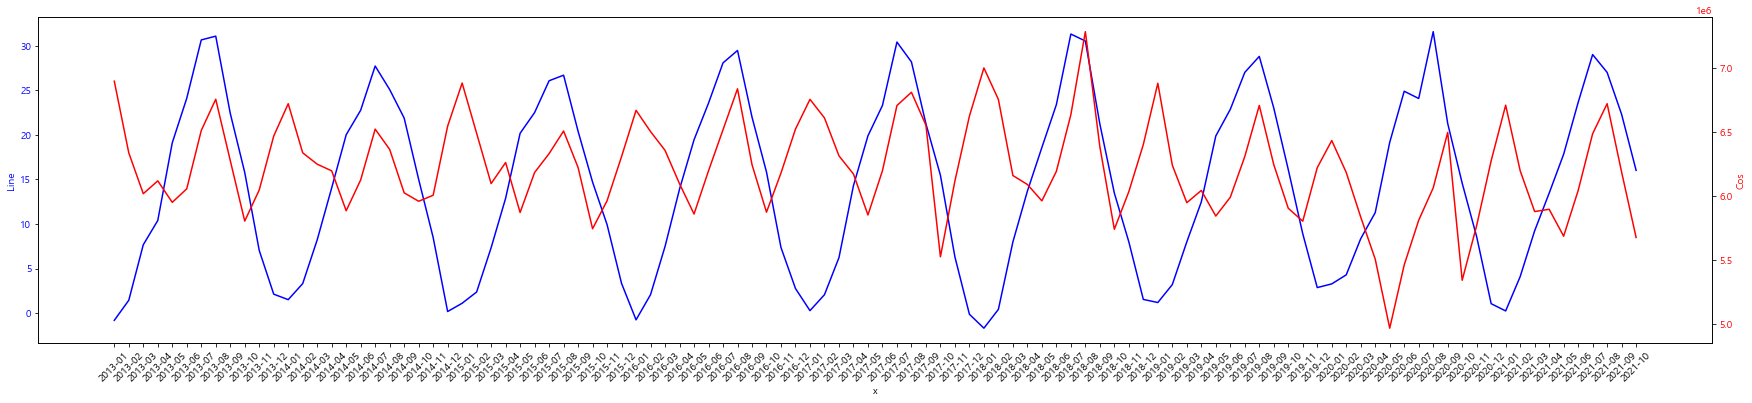

In [167]:
y1 = list(df_all['elecusage'])
y2 = list(df_all['HI'])
x = list(df_all['date'])

fig = plt.figure(figsize=(30,6)) ## 캔버스 생성
fig.set_facecolor('white')
ax1 = fig.add_subplot() ## axes 생성
plt.xticks(rotation=45)
 
color1 = 'b'
ax1.plot(x, y2, color=color1)
ax1.set_xlabel('x')
ax1.set_ylabel('Line', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
 
color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(x, y1, color=color2)
ax2.set_ylabel('Cos', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.show()

* 전체 추세의 상관관계 분석

In [168]:
df_all_corr = df_all.corr()

df_all_corr

,year,month,HI,elecusage,type_ratio
year,1.000000,-0.044222,0.039831,-0.196738,0.047798
month,-0.044222,1.000000,0.270377,-0.189236,0.464360
HI,0.039831,0.270377,1.000000,-0.091972,0.843868
elecusage,-0.196738,-0.189236,-0.091972,1.000000,-0.178422
type_ratio,0.047798,0.464360,0.843868,-0.178422,1.000000


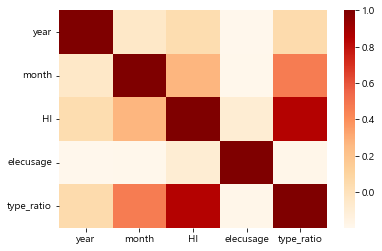

In [169]:
matplotlib.rcParams['axes.unicode_minus'] = False
sns.heatmap(df_all_corr, cmap='OrRd')
plt.show()

# 열지수와 전력 사용량의 유의미한 상관관계를 관찰하기 어렵다.

### **5,6,7,8,9월의 전체 추세 그래프**

In [170]:
# 열지수와 전력 사용량만 있는 df_all 테이블에서 5,6,7,8,9월 기간만 다른 테이블으로 분리
df_summer = df_all[(df_all['month'] > 4) & (df_all['month'] < 10)]

df_summer

,date,year,month,HI,elecusage,type_ratio
4,2013-05,2013.0,5.0,19.112189,5.949231e+06,55.643087
5,2013-06,2013.0,6.0,24.116313,6.055299e+06,57.055453
6,2013-07,2013.0,7.0,30.656301,6.510325e+06,57.567366
7,2013-08,2013.0,8.0,31.079638,6.754776e+06,56.920162
8,2013-09,2013.0,9.0,22.425981,6.276699e+06,56.894666
16,2014-05,2014.0,5.0,20.015459,5.883720e+06,56.522796
17,2014-06,2014.0,6.0,22.773004,6.124807e+06,57.515984
18,2014-07,2014.0,7.0,27.726040,6.521361e+06,58.109226
19,2014-08,2014.0,8.0,25.088558,6.362734e+06,57.636200
20,2014-09,2014.0,9.0,21.891071,6.023793e+06,57.850256


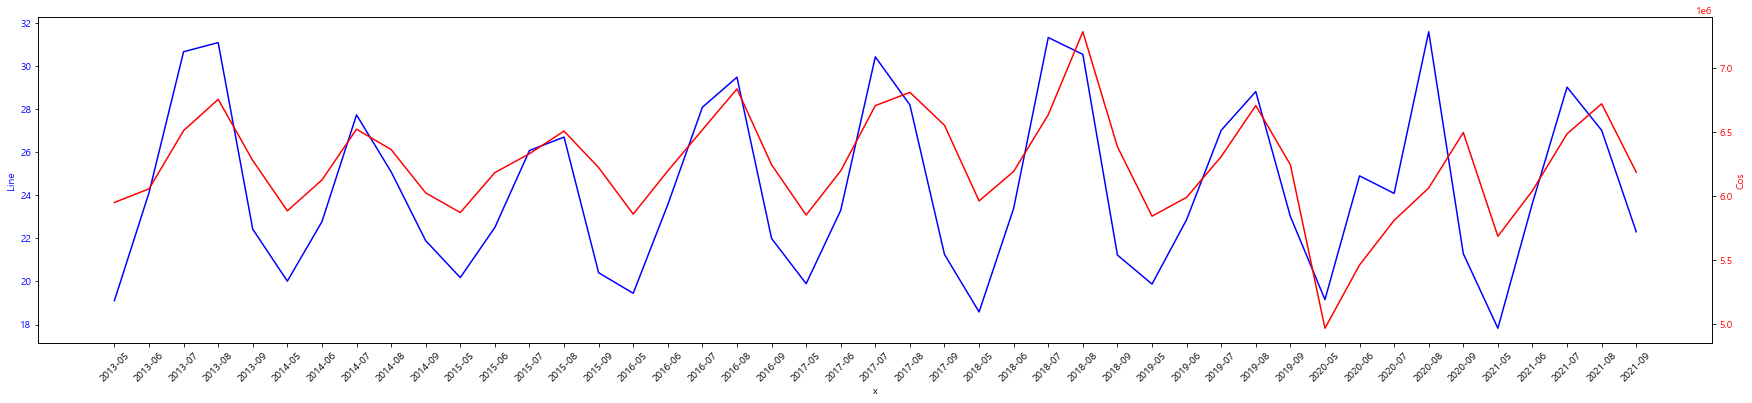

In [171]:
y1 = list(df_summer['elecusage'])
y2 = list(df_summer['HI'])
x = list(df_summer['date'])

fig = plt.figure(figsize=(30,6)) ## 캔버스 생성
fig.set_facecolor('white')
ax1 = fig.add_subplot() ## axes 생성
plt.xticks(rotation=45)
 
color1 = 'b'
ax1.plot(x, y2, color=color1)
ax1.set_xlabel('x')
ax1.set_ylabel('Line', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
 
color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(x, y1, color=color2)
ax2.set_ylabel('Cos', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.show()

* 5,6,7,8,9월의 전체 상관관계 분석

In [172]:
df_summer_corr = df_summer.corr()

df_summer_corr

,year,month,HI,elecusage,type_ratio
year,1.000000e+00,6.551201e-15,-0.012835,-0.156865,-0.344842
month,6.551201e-15,1.000000e+00,0.361974,0.591315,0.157080
HI,-1.283530e-02,3.619738e-01,1.000000,0.695558,0.284978
elecusage,-1.568646e-01,5.913147e-01,0.695558,1.000000,0.300164
type_ratio,-3.448425e-01,1.570804e-01,0.284978,0.300164,1.000000


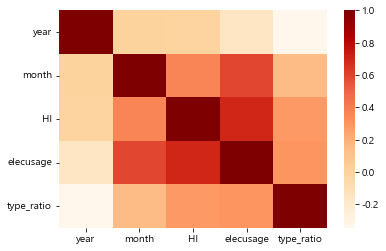

In [173]:
matplotlib.rcParams['axes.unicode_minus'] = False
sns.heatmap(df_summer_corr, cmap='OrRd')
plt.show()

# 열지수와 전력 사용량의 상관관계가 0.70 정도로 유의미하다

### **특정 동을 관찰하기 위한 그래프**

In [174]:
# join한 원본 테이블에서 unique한 region 확인 후 리스트에 저장
regions = df_join['region'].unique()

print(regions)

print('\n region의 수 :', len(regions))

['가창면' '감삼동' '검단동' '고산1동' '고산2동' '고산3동' '고성동' '공산동' '관문동' '관음동' '구암동'
 '구지면' '국우동' '남산1동' '남산2동' '남산3동' '남산4동' '내당1동' '내당2.3동' '내당4동' '노원동'
 '논공읍' '다사읍' '대명10동' '대명11동' '대명1동' '대명2동' '대명3동' '대명4동' '대명5동' '대명6동'
 '대명9동' '대봉1동' '대봉2동' '대신동' '대현동' '도원동' '도평동' '동인동' '동촌동' '두류1.2동' '두류3동'
 '두산동' '만촌1동' '만촌2동' '만촌3동' '무태조야동' '방촌동' '범물1동' '범물2동' '범어1동' '범어2동'
 '범어3동' '범어4동' '복현1동' '복현2동' '본동' '본리동' '봉덕1동' '봉덕2동' '봉덕3동' '불로.봉무동'
 '비산1동' '비산2.3동' '비산4동' '비산5동' '비산6동' '비산7동' '산격1동' '산격2동' '산격3동' '산격4동'
 '삼덕동' '상동' '상인1동' '상인2동' '상인3동' '상중이동' '성내동' '성당동' '송현1동' '송현2동' '수성1가동'
 '수성2.3가동' '수성4가동' '신당동' '신암1동' '신암2동' '신암3동' '신암4동' '신암5동' '신천1.2동'
 '신천3동' '신천4동' '안심1동' '안심2동' '안심3.4동' '안심3동' '안심4동' '옥포읍' '용산동' '원대동'
 '월성1동' '월성2동' '유가읍' '이곡동' '이천동' '장기동' '죽전동' '중동' '지산1동' '지산2동' '지저동'
 '진천동' '칠성동' '침산1동' '침산2동' '침산3동' '태전1동' '파동' '평리1동' '평리2동' '평리3동' '평리4동'
 '평리5동' '평리6동' '하빈면' '해안동' '현풍읍' '화원읍' '황금1동' '황금2동' '효목1동' '효목2동']

 region의 수 : 134


134개를 다 보기엔 힘드므로 랜덤으로 10개를 추출해서 그래프 확인

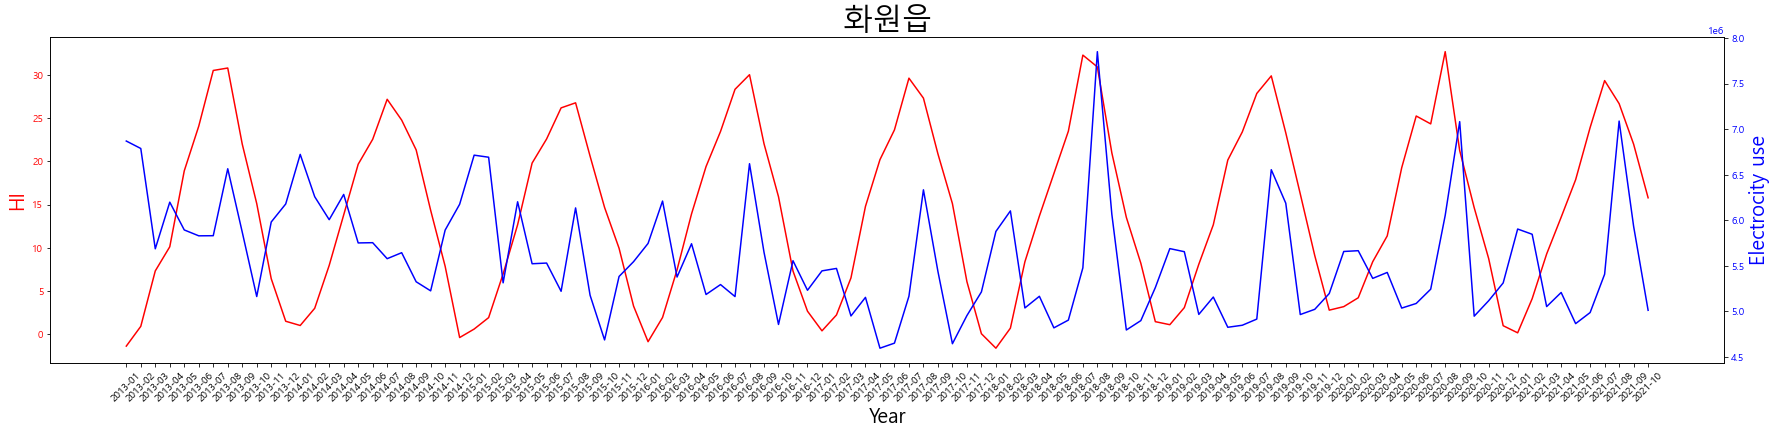

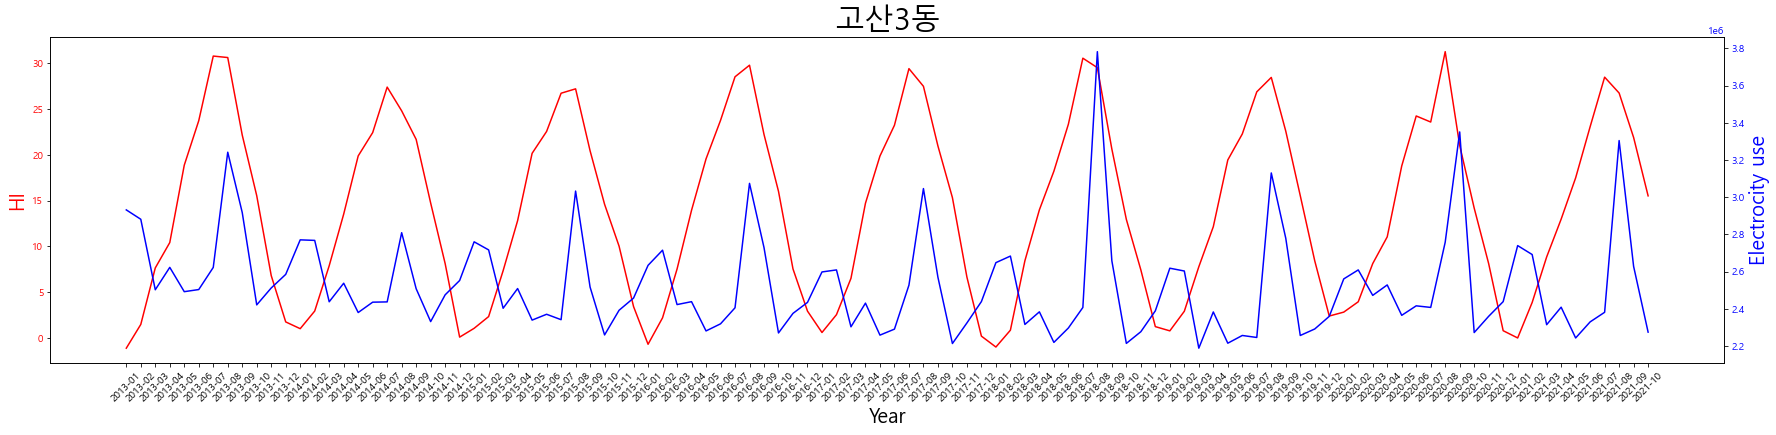

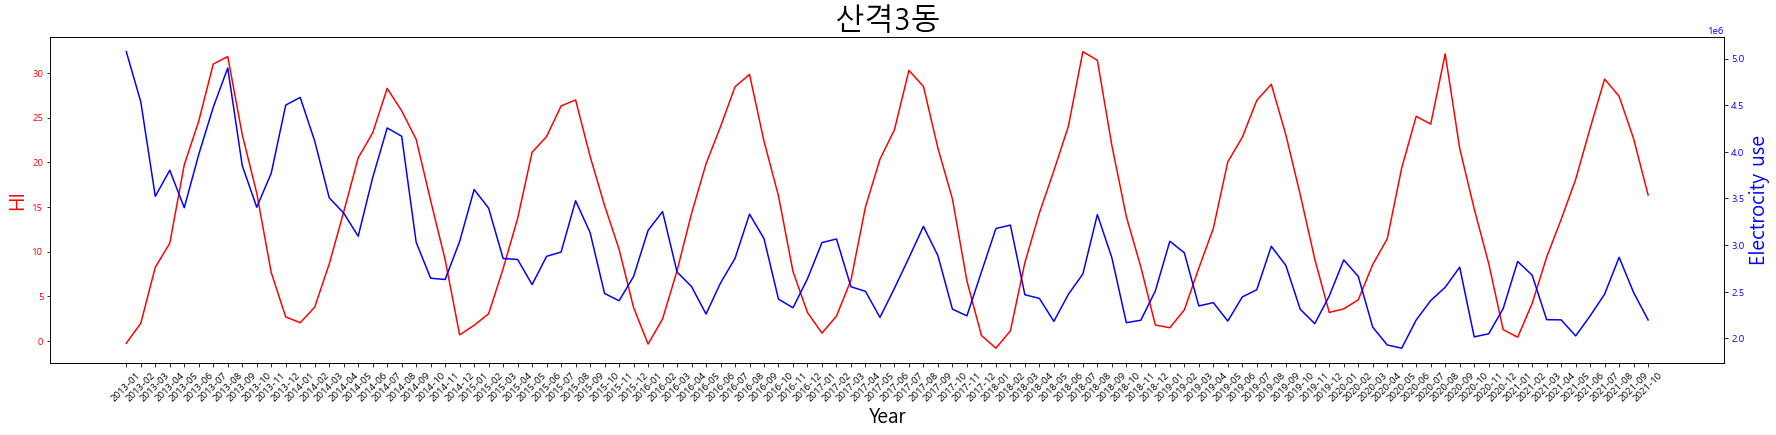

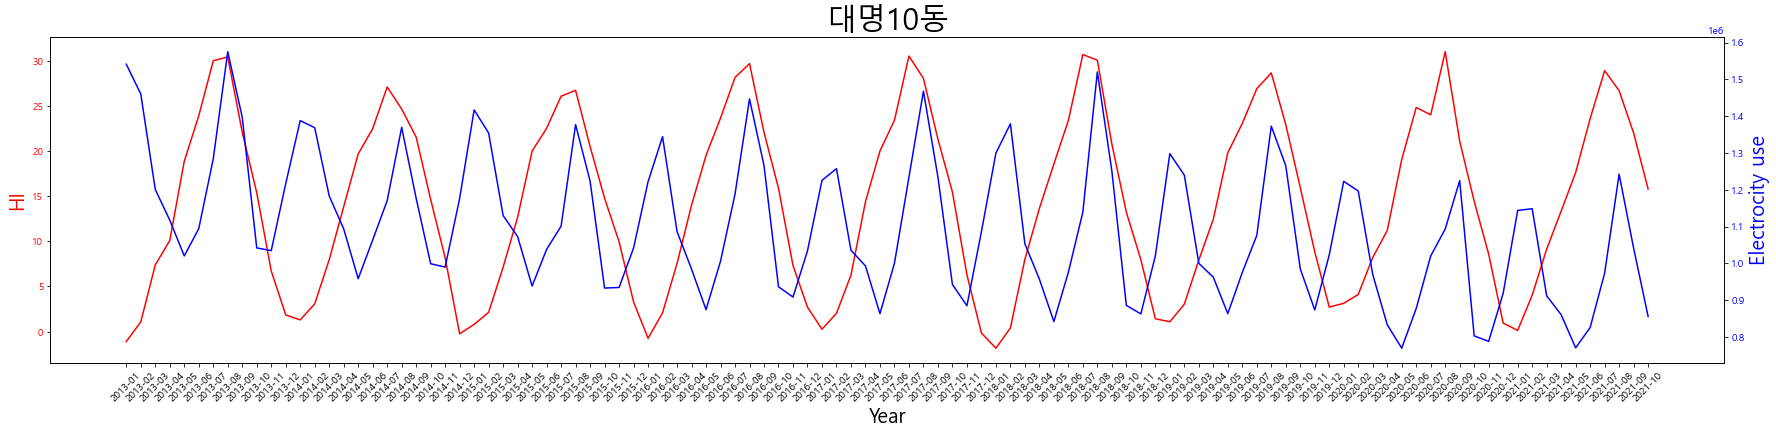

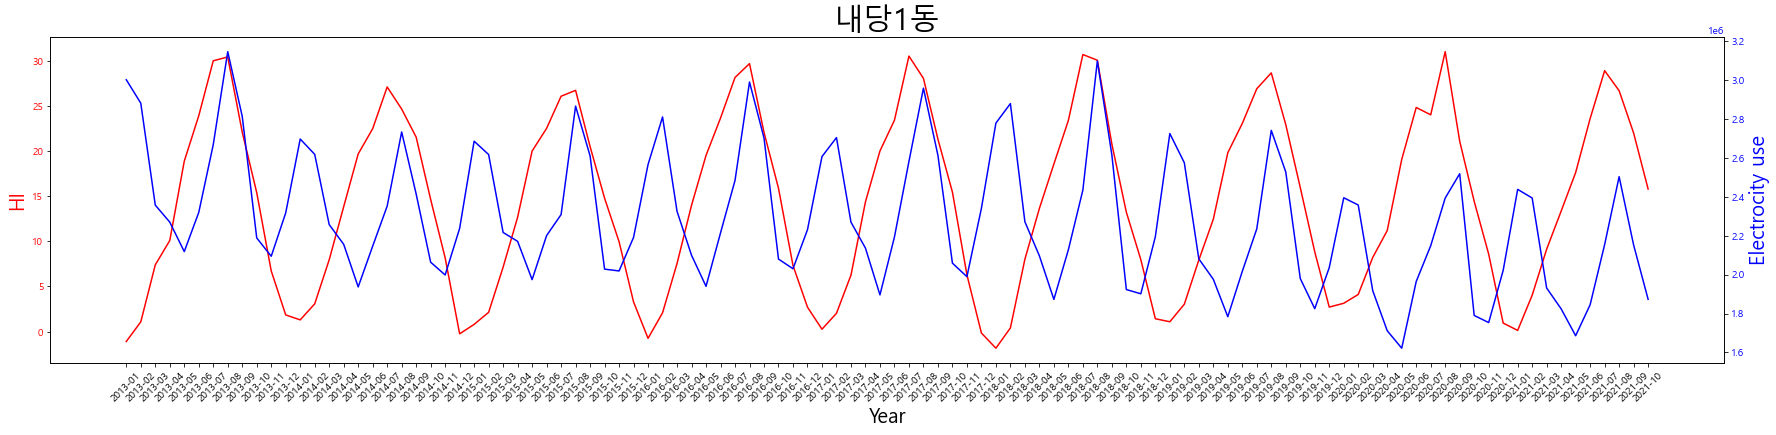

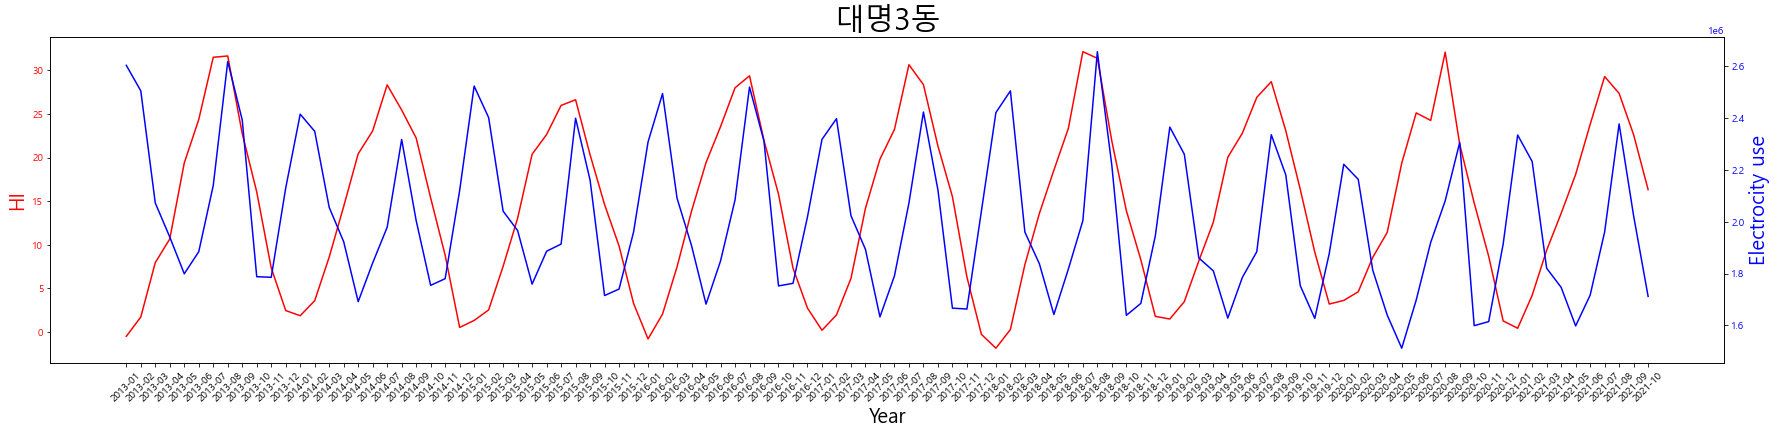

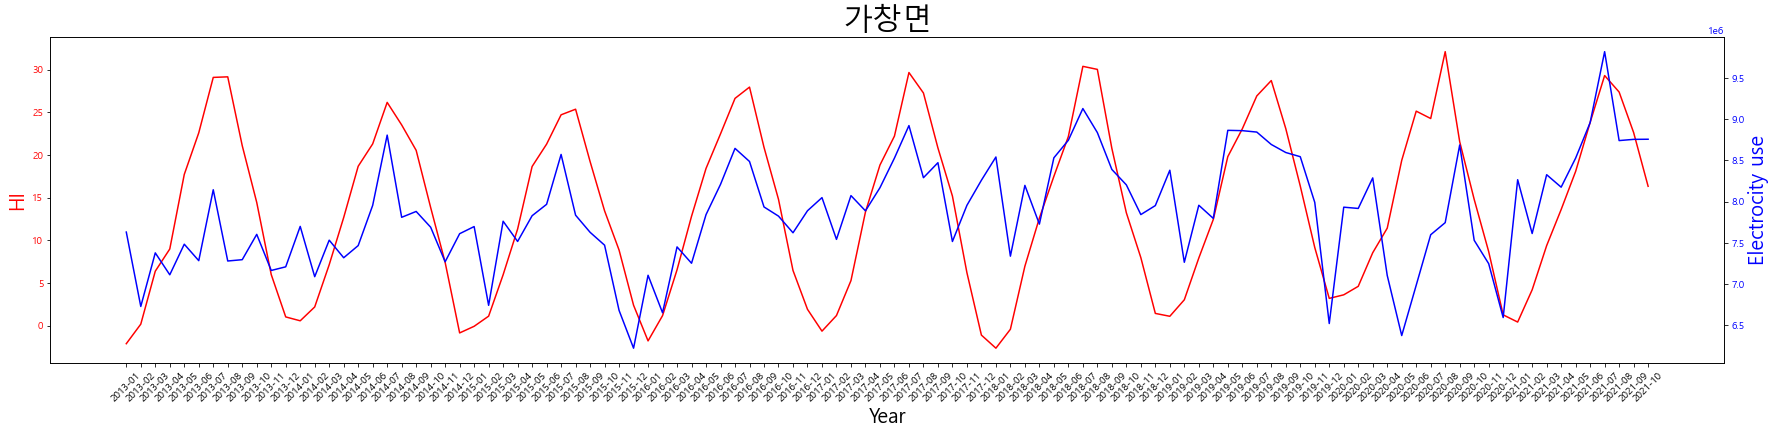

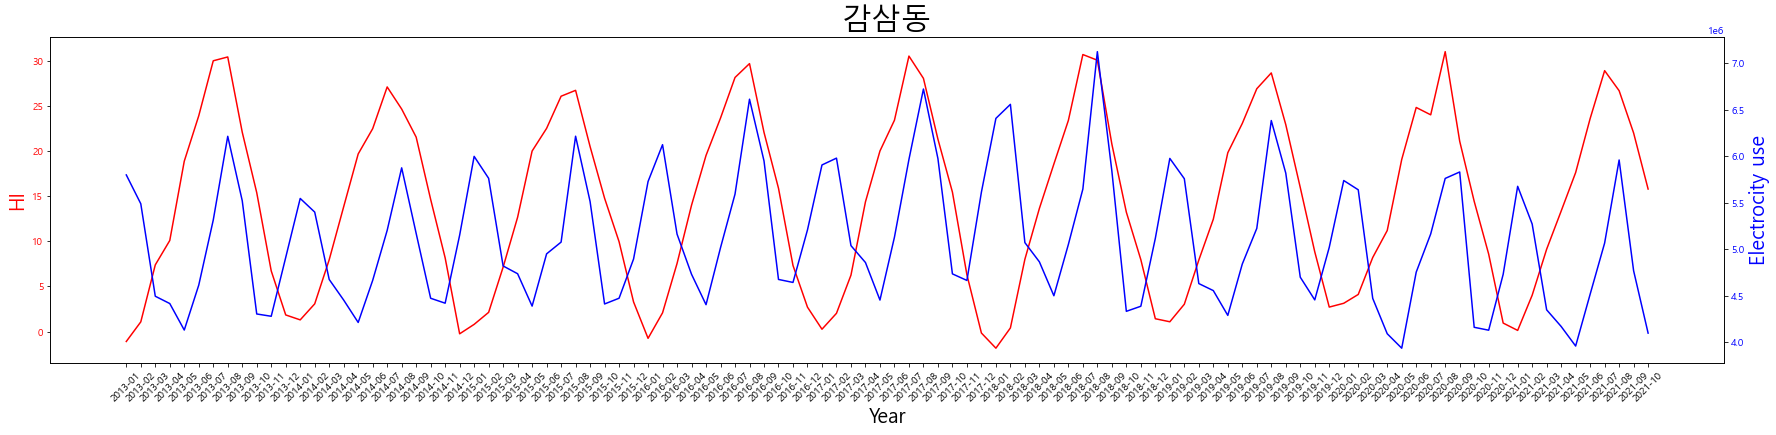

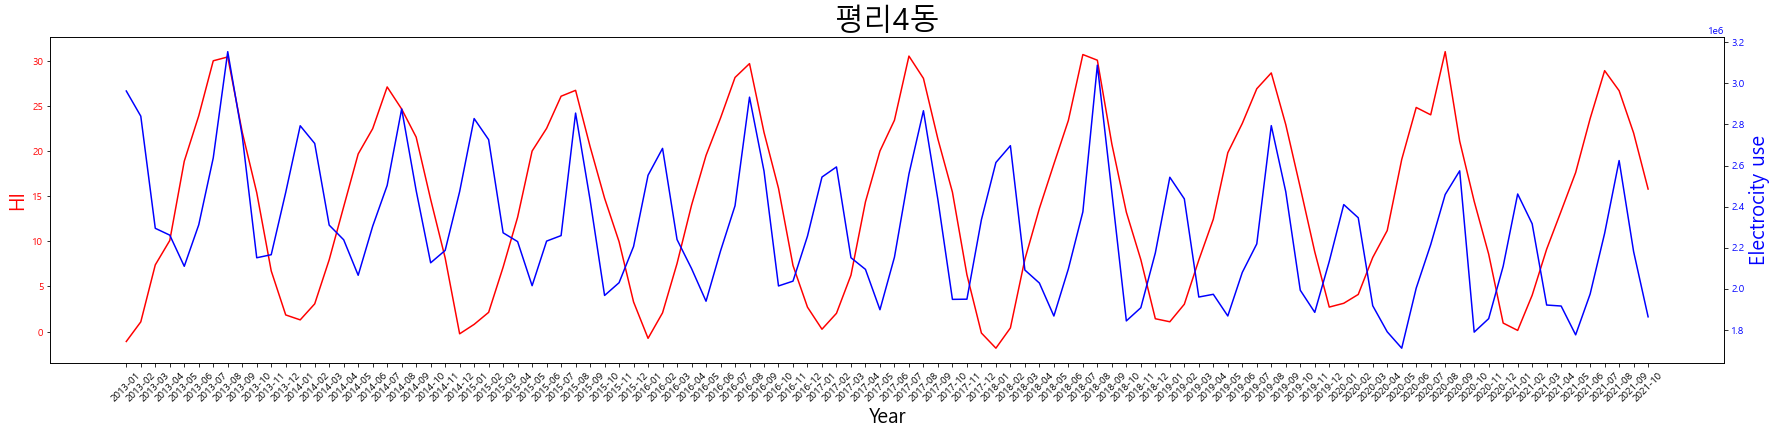

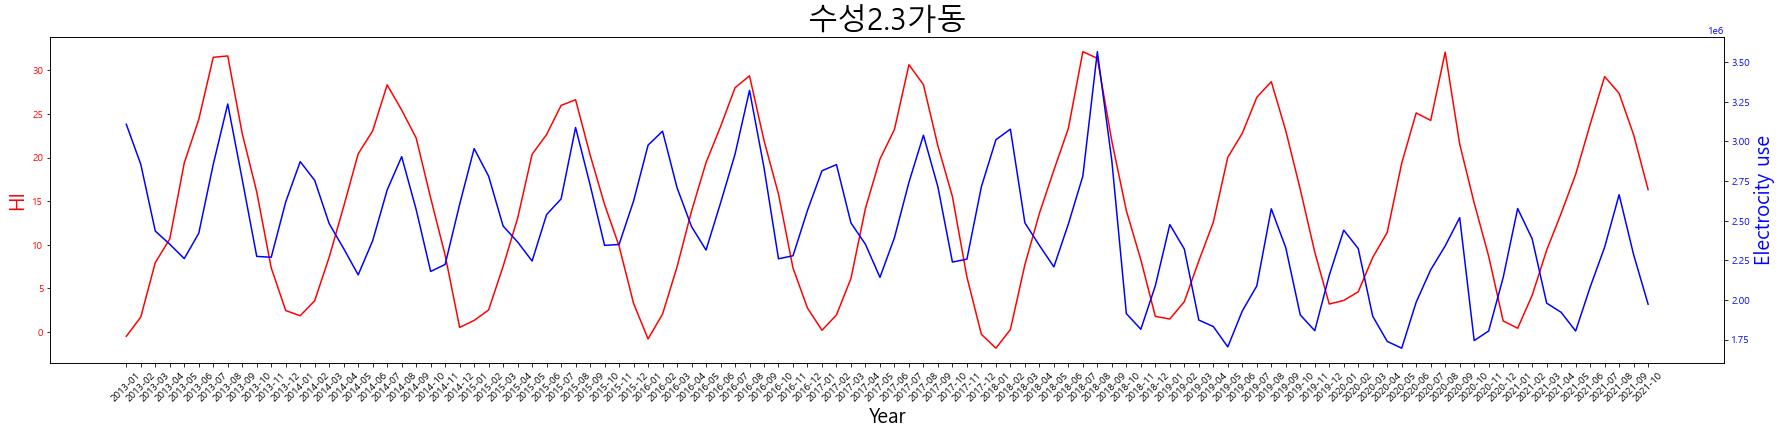

In [175]:
random.shuffle(regions) # unique한 region 리스트에서 랜덤으로 10개 추출

for i in range(10):

    y1 = list(df_join.loc[df_join['region'] == regions[i], 'elecusage'])
    y2 = list(df_join.loc[df_join['region'] == regions[i], 'HI'])
    x = list(df_join.loc[df_join['region'] == regions[i], 'date'])

    fig = plt.figure(figsize=(30,6)) ## 캔버스 생성
    fig.set_facecolor('white')
    ax1 = fig.add_subplot() ## axes 생성
    plt.xticks(rotation=45)
    
    color1 = 'r'
    ax1.plot(x, y2, color=color1)
    ax1.set_xlabel('Year', fontsize = 20)
    ax1.set_ylabel('HI', color=color1, fontsize = 20)
    ax1.set_title(regions[i], fontsize = 30)
    ax1.tick_params(axis='y', labelcolor=color1)
    
    color2 = 'b'
    ax2 = ax1.twinx()
    ax2.plot(x, y1, color=color2)
    ax2.set_ylabel('Electrocity use', color=color2, fontsize = 20)
    ax2.tick_params(axis='y', labelcolor=color2)
    
    plt.show()

----
그래프가 행정구역별로 상이해 특정 패턴을 발견하기 힘들다

### **지역용도별로 열지수와 전력 사용량의 관계 그래프**  
  
전체 기간

In [176]:
# 지역용도가 포함된 테이블이 필요하기 때문에 join했던 원본 테이블을 지역용도를 기준으로 groupby
df_type = df_join.groupby(['type','year','month','date']).mean().reset_index()

df_type

,type,year,month,date,HI,elecusage,type_ratio
0,교육용,2013,1,2013-01,-0.256282,5.074385e+06,47.145143
1,교육용,2013,2,2013-02,1.977468,4.536513e+06,45.501293
2,교육용,2013,3,2013-03,8.244469,3.522628e+06,44.424844
3,교육용,2013,4,2013-04,10.932059,3.802360e+06,46.805334
4,교육용,2013,5,2013-05,19.709338,3.400621e+06,46.447047
...,...,...,...,...,...,...,...
333,주택용,2021,6,2021-06,23.634897,2.320325e+06,50.898135
334,주택용,2021,7,2021-07,28.997015,2.600523e+06,51.640871
335,주택용,2021,8,2021-08,26.987247,3.429251e+06,52.903156
336,주택용,2021,9,2021-09,22.287274,2.740310e+06,51.252698


In [177]:
# unique한 타입 확인 후 리스트에 저장
types = list(df_join['type'].unique())

types

['산업용', '일반용', '주택용', '교육용']

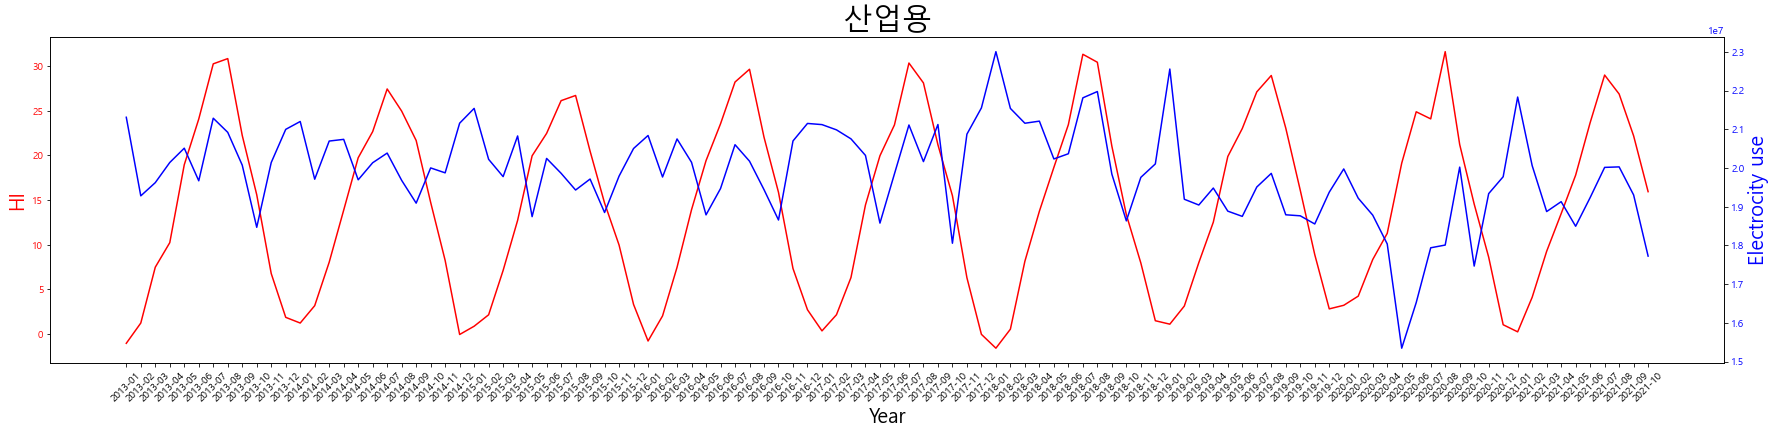

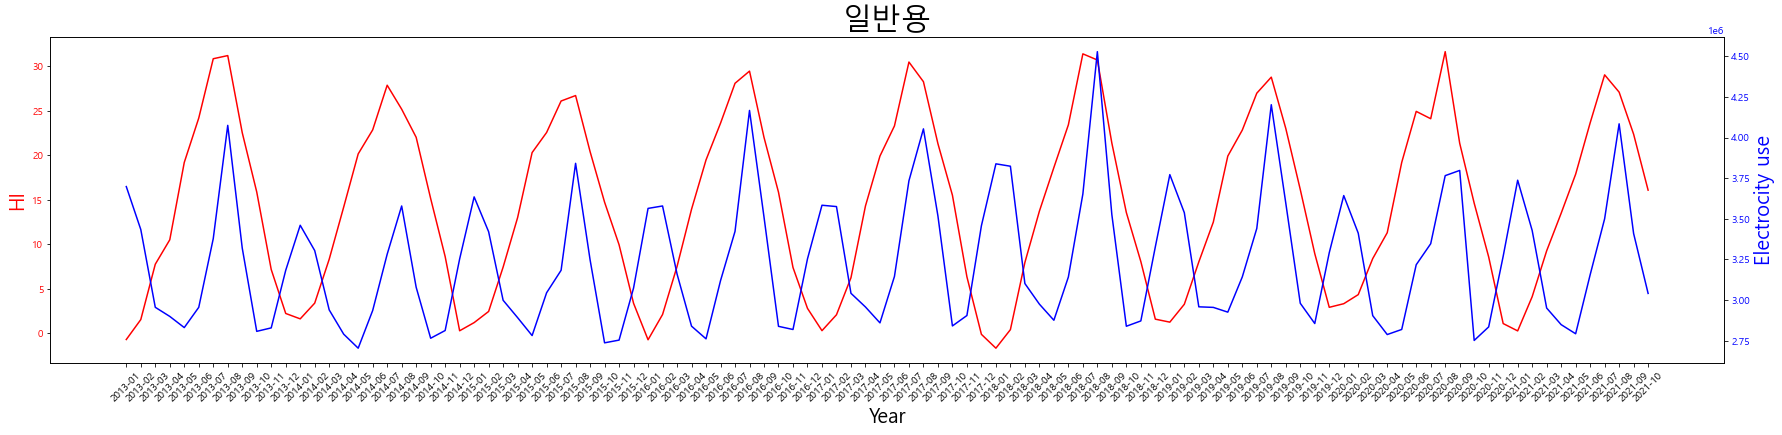

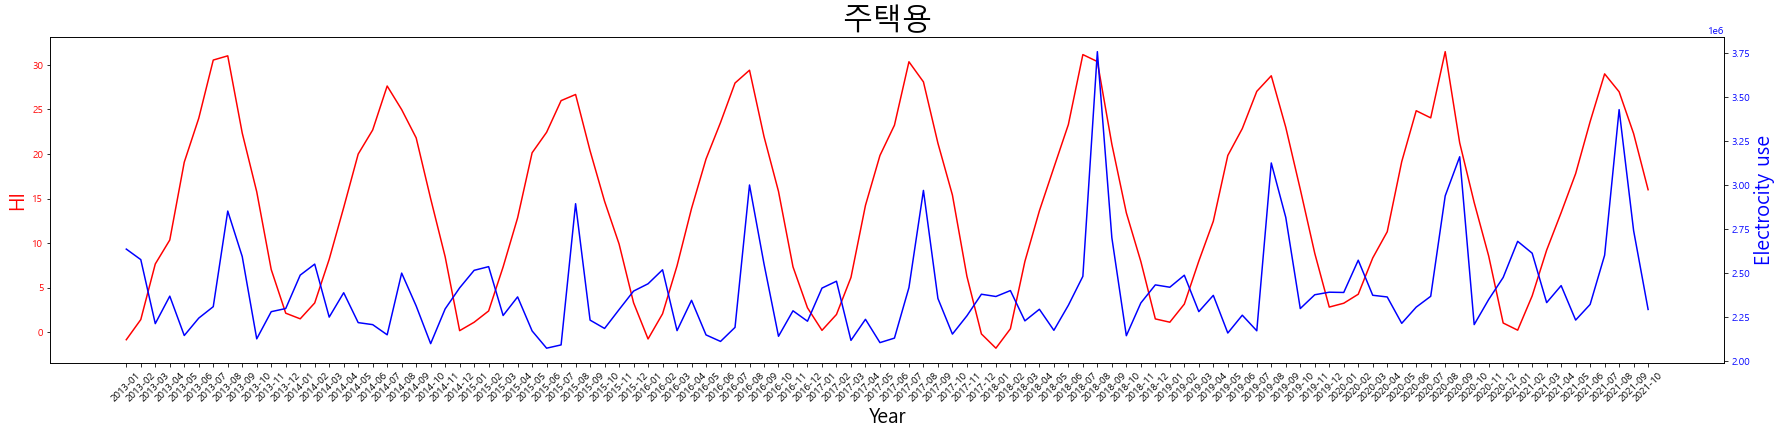

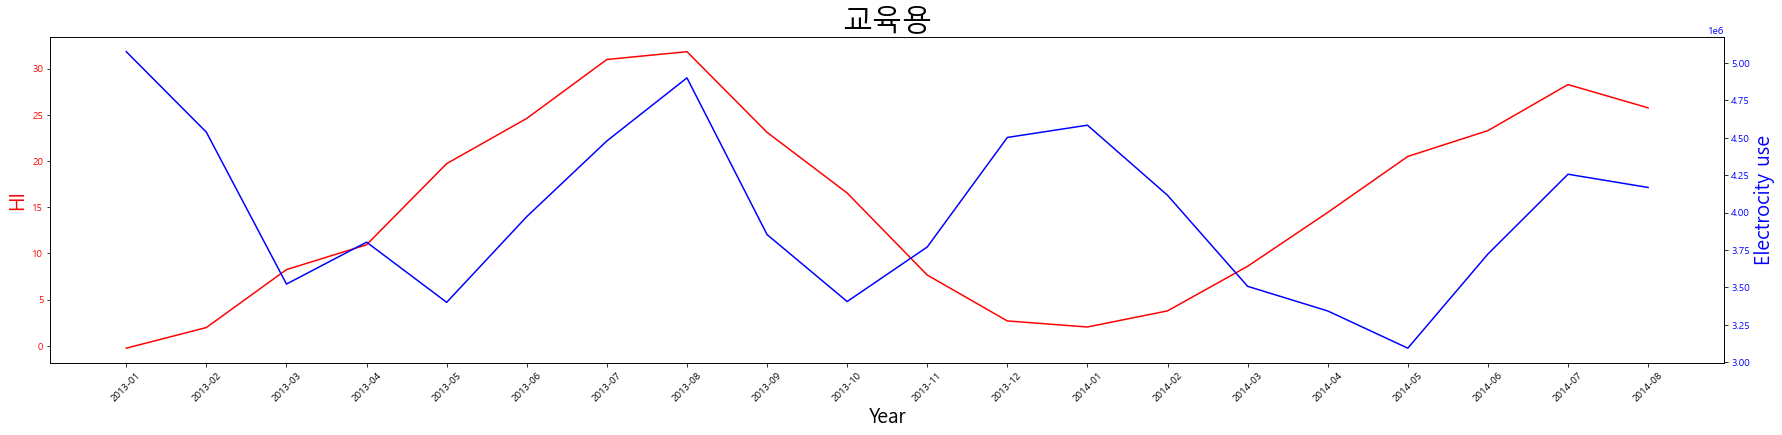

In [178]:
for i in range(len(types)):

    y1 = list(df_type.loc[df_type['type'] == types[i], 'elecusage'])
    y2 = list(df_type.loc[df_type['type'] == types[i], 'HI'])
    x = list(df_type.loc[df_type['type'] == types[i], 'date'])

    fig = plt.figure(figsize=(30,6)) ## 캔버스 생성
    fig.set_facecolor('white')
    ax1 = fig.add_subplot() ## axes 생성
    plt.xticks(rotation=45)
    
    color1 = 'r'
    ax1.plot(x, y2, color=color1)
    ax1.set_xlabel('Year', fontsize = 20)
    ax1.set_ylabel('HI', color=color1, fontsize = 20)
    ax1.set_title(types[i], fontsize = 30)
    ax1.tick_params(axis='y', labelcolor=color1)
    
    color2 = 'b'
    ax2 = ax1.twinx()
    ax2.plot(x, y1, color=color2)
    ax2.set_ylabel('Electrocity use', color=color2, fontsize = 20)
    ax2.tick_params(axis='y', labelcolor=color2)
    
    plt.show()

### **지역용도별 5,6,7,8,9월 그래프**

In [179]:
# 지역용도별 데이터의 5,6,7,8,9월만 다른 테이블에 저장
df_type_summer = df_type[(df_type['month'] > 4) & (df_type['month'] < 10)]

df_type_summer

,type,year,month,date,HI,elecusage,type_ratio
4,교육용,2013,5,2013-05,19.709338,3.400621e+06,46.447047
5,교육용,2013,6,2013-06,24.601262,3.972934e+06,49.703619
6,교육용,2013,7,2013-07,30.974885,4.478229e+06,50.213790
7,교육용,2013,8,2013-08,31.820490,4.899448e+06,48.180841
8,교육용,2013,9,2013-09,23.093166,3.853090e+06,45.100881
...,...,...,...,...,...,...,...
332,주택용,2021,5,2021-05,17.795659,2.231171e+06,51.767838
333,주택용,2021,6,2021-06,23.634897,2.320325e+06,50.898135
334,주택용,2021,7,2021-07,28.997015,2.600523e+06,51.640871
335,주택용,2021,8,2021-08,26.987247,3.429251e+06,52.903156


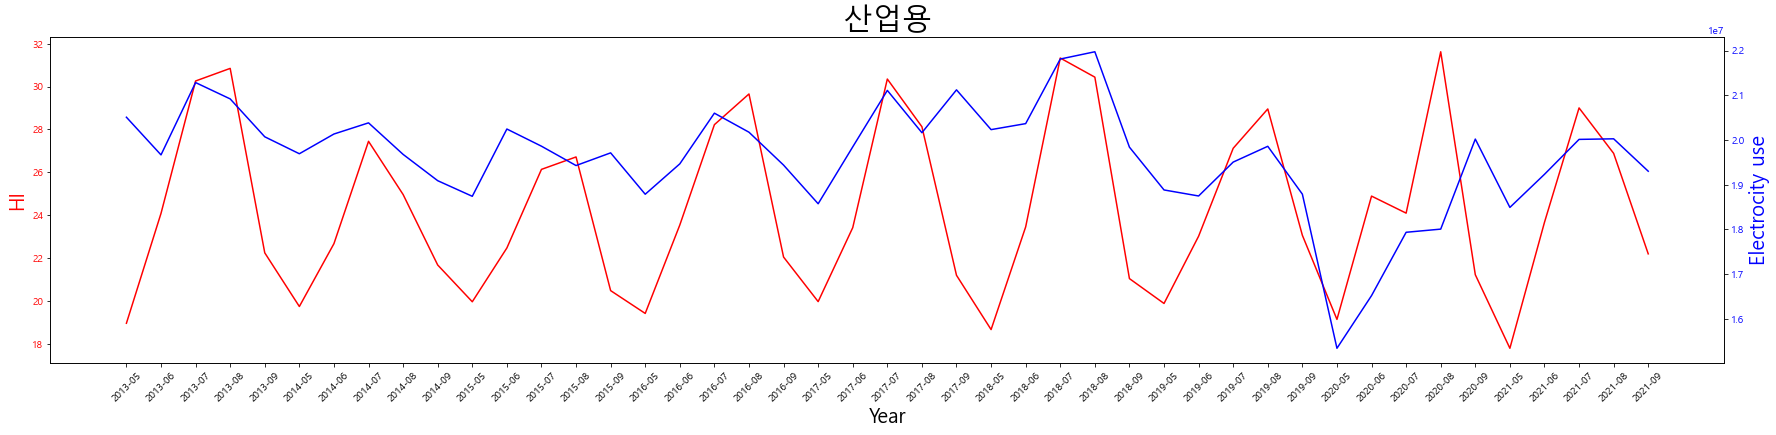

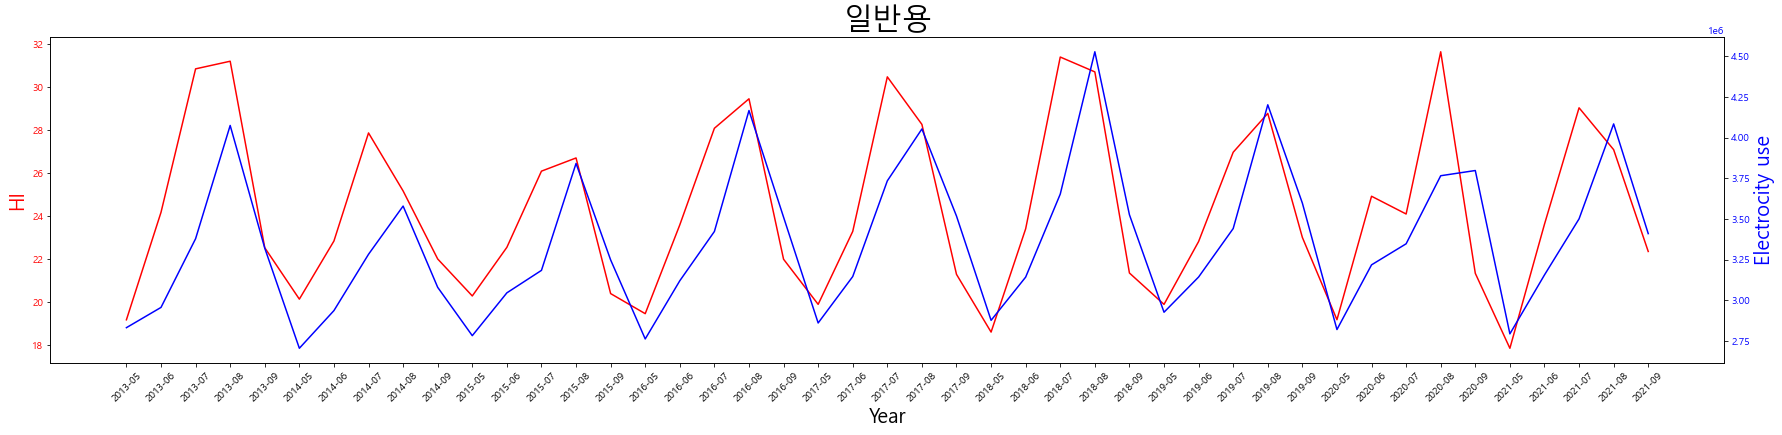

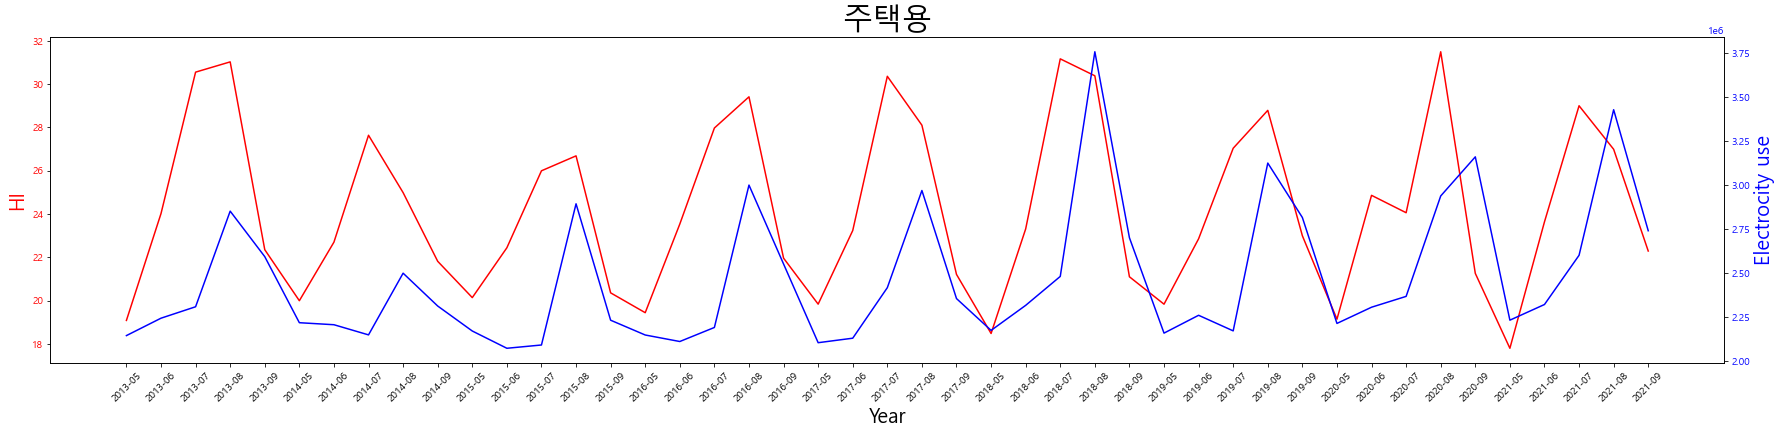

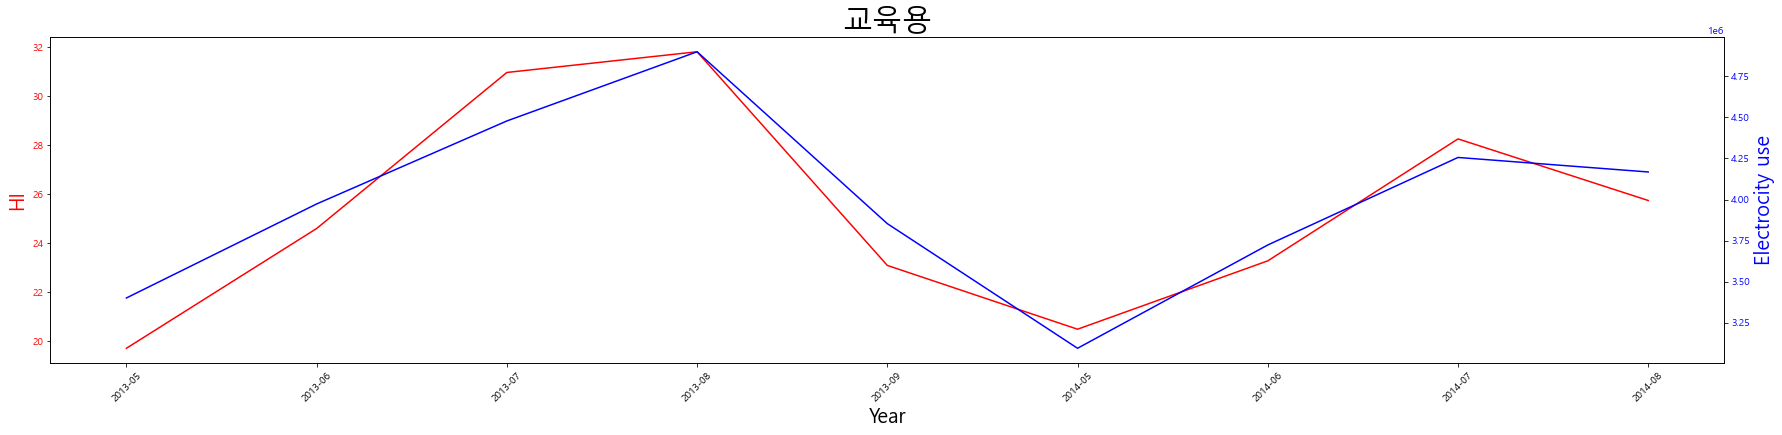

In [180]:
for i in range(len(types)):

    y1 = list(df_type_summer.loc[df_type_summer['type'] == types[i], 'elecusage'])
    y2 = list(df_type_summer.loc[df_type_summer['type'] == types[i], 'HI'])
    x = list(df_type_summer.loc[df_type_summer['type'] == types[i], 'date'])

    fig = plt.figure(figsize=(30,6)) ## 캔버스 생성
    fig.set_facecolor('white')
    ax1 = fig.add_subplot() ## axes 생성
    plt.xticks(rotation=45)
    
    color1 = 'r'
    ax1.plot(x, y2, color=color1)
    ax1.set_xlabel('Year', fontsize = 20)
    ax1.set_ylabel('HI', color=color1, fontsize = 20)
    ax1.set_title(types[i], fontsize = 30)
    ax1.tick_params(axis='y', labelcolor=color1)
    
    color2 = 'b'
    ax2 = ax1.twinx()
    ax2.plot(x, y1, color=color2)
    ax2.set_ylabel('Electrocity use', color=color2, fontsize = 20)
    ax2.tick_params(axis='y', labelcolor=color2)
    
    plt.show()

* 상관관계 분석

                    year         month        HI  elecusage  type_ratio
year        1.000000e+00  6.551201e-15  0.001319  -0.385635   -0.830264
month       6.551201e-15  1.000000e+00  0.359594   0.292236   -0.341041
HI          1.318955e-03  3.595943e-01  1.000000   0.422598   -0.259661
elecusage  -3.856352e-01  2.922363e-01  0.422598   1.000000    0.310228
type_ratio -8.302636e-01 -3.410405e-01 -0.259661   0.310228    1.000000


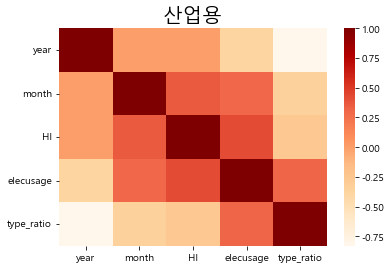

------------------------------------------------------------------------------------------------------------------------------------------------------
                    year         month        HI  elecusage  type_ratio
year        1.000000e+00  6.551201e-15 -0.018806   0.171202    0.341599
month       6.551201e-15  1.000000e+00  0.362887   0.701978    0.524047
HI         -1.880608e-02  3.628871e-01  1.000000   0.746695    0.479210
elecusage   1.712021e-01  7.019783e-01  0.746695   1.000000    0.474248
type_ratio  3.415993e-01  5.240474e-01  0.479210   0.474248    1.000000


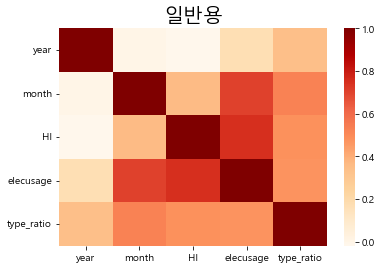

------------------------------------------------------------------------------------------------------------------------------------------------------
                    year         month        HI  elecusage  type_ratio
year        1.000000e+00  6.551201e-15 -0.009512   0.289313    0.318870
month       6.551201e-15  1.000000e+00  0.361690   0.616602    0.266108
HI         -9.512244e-03  3.616898e-01  1.000000   0.489122    0.302354
elecusage   2.893132e-01  6.166025e-01  0.489122   1.000000    0.661982
type_ratio  3.188695e-01  2.661083e-01  0.302354   0.661982    1.000000


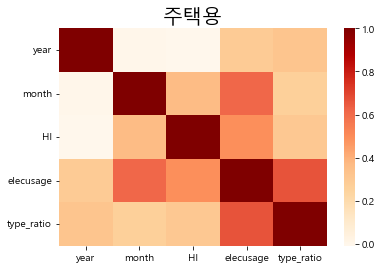

------------------------------------------------------------------------------------------------------------------------------------------------------
                year     month        HI  elecusage  type_ratio
year        1.000000 -0.188982 -0.195898  -0.298385   -0.023929
month      -0.188982  1.000000  0.545618   0.662328   -0.061795
HI         -0.195898  0.545618  1.000000   0.956646    0.658770
elecusage  -0.298385  0.662328  0.956646   1.000000    0.569897
type_ratio -0.023929 -0.061795  0.658770   0.569897    1.000000


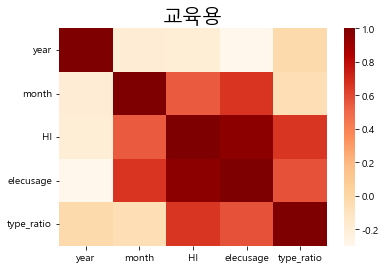

------------------------------------------------------------------------------------------------------------------------------------------------------


In [181]:
for i in range(len(types)):
    df_type_temp = df_type_summer[df_type_summer['type'] == types[i]]

    df_type_temp_corr = df_type_temp.corr()
    
    print(df_type_temp_corr)
    
    matplotlib.rcParams['axes.unicode_minus'] = False
    sns.heatmap(df_type_temp_corr, cmap='OrRd')

    plt.title(types[i], fontsize = 20)
    plt.show()

    print('-----'*30)

---
열지수와 전력 사용량의 가장 큰 상관관계가 나타나는 지역용도는 '교육용'이다

In [182]:
print('산업용으로 분류된 경우 수 : ',len(df_join[df_join['type'] == '산업용']))
print('일반용으로 분류된 경우 수 : ',len(df_join[df_join['type'] == '일반용']))
print('주택용으로 분류된 경우 수 : ',len(df_join[df_join['type'] == '주택용']))
print('교육용으로 분류된 경우 수 : ',len(df_join[df_join['type'] == '교육용']))

산업용으로 분류된 경우 수 :  2707
일반용으로 분류된 경우 수 :  7257
주택용으로 분류된 경우 수 :  4024
교육용으로 분류된 경우 수 :  20


그러나 교육용으로 분류된 경우가 극히 소수이므로 편향된 결과일 수 있다.

### **열지수 상위 100개의 경우 지역용도의 분포**

In [183]:
df_top_HI = df_join.sort_values(by='HI', ascending=False).head(100)

df_top_HI

,region,year,month,HI,type,elecusage,type_ratio,date
13627,하빈면,2020,8,33.738278,산업용,6325782.0,75.815961,2020-08
2497,다사읍,2020,8,33.738278,산업용,23090062.0,49.454146,2020-08
2386,논공읍,2020,8,32.707299,산업용,78821245.0,90.744583,2020-08
13965,화원읍,2020,8,32.685176,주택용,6052972.0,39.764850,2020-08
10656,옥포읍,2020,8,32.685176,산업용,4484756.0,39.613262,2020-08
...,...,...,...,...,...,...,...,...
11985,지산2동,2020,8,32.099886,주택용,1160142.0,57.052975,2020-08
3789,대신동,2020,8,32.099886,일반용,2889088.0,63.362668,2020-08
3571,대봉1동,2020,8,32.099886,일반용,3312349.0,62.096139,2020-08
6501,봉덕2동,2020,8,32.099886,주택용,1020646.0,56.011590,2020-08


In [184]:
# 열지수 상위 100개의 경우
print('산업용으로 분류된 경우 수 : ',len(df_top_HI[df_top_HI['type'] == '산업용']))
print('일반용으로 분류된 경우 수 : ',len(df_top_HI[df_top_HI['type'] == '일반용']))
print('주택용으로 분류된 경우 수 : ',len(df_top_HI[df_top_HI['type'] == '주택용']))
print('교육용으로 분류된 경우 수 : ',len(df_top_HI[df_top_HI['type'] == '교육용']))

산업용으로 분류된 경우 수 :  17
일반용으로 분류된 경우 수 :  60
주택용으로 분류된 경우 수 :  23
교육용으로 분류된 경우 수 :  0


---
열지수 상위 100개의 경우 '일반용' 지역이 가장 많다.

In [185]:
# 전체의 경우
print('산업용으로 분류된 경우 수 : ',len(df_join[df_join['type'] == '산업용']))
print('일반용으로 분류된 경우 수 : ',len(df_join[df_join['type'] == '일반용']))
print('주택용으로 분류된 경우 수 : ',len(df_join[df_join['type'] == '주택용']))
print('교육용으로 분류된 경우 수 : ',len(df_join[df_join['type'] == '교육용']))

산업용으로 분류된 경우 수 :  2707
일반용으로 분류된 경우 수 :  7257
주택용으로 분류된 경우 수 :  4024
교육용으로 분류된 경우 수 :  20


---
그러나 전체 데이터의 경우에도 '일반용' 지역이 가장 많다.

### 2. 결론

**용도별 지역분류 중 '일반용'이 가장 많으며 열지수 상위 100개의 경우도 '일반용' 지역이 다른 용도보다 많다.**   


**5,6,7,8,9월의 경우 전력사용량과 열지수가 높은 상관관계를 보인다.** 
* 0.422598 산업용
* 0.746695 일반용
* 0.489122 주택용
* 0.956646 교육용    


* 산업용과 주택용의 경우는 일반용과 교육용에 비해 상관관계가 낮다.
* 교육용의 경우 상관관계가 높지만 표본이 20개밖에 되지 않는다.
  
  

**지역 용도에 따른 열지수의 유의미한 차이는 관찰할 수 없다.**